In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Загрузка данных
data = pd.read_csv('0_0_X.csv', sep=';')
data


,X..commit,X..memused,X..swpcad,X..swpused,X.dev.mapper.cloud..2.root_.Iused,X.dev.mapper.cloud..2.root_.fsused,X.dev.mapper.cloud..2.root_.ufsused,X.dev.sda1_.Iused,X.dev.sda1_.fsused,X.dev.sda1_.ufsused,...,temp1_.temp,temp1_degC,temp2_.temp,temp2_degC,temp3_.temp,temp3_degC,temp4_.temp,temp4_degC,tps,wtps
0,0.85,40.62,16.89,0.3,2.17,52.04,57.12,0.25,38.91,44.25,...,27.86,19.50,26.43,18.50,29.29,20.50,29.29,20.5,0.0,0.0
1,0.85,40.62,16.89,0.3,2.17,52.04,57.12,0.25,38.91,44.25,...,27.86,19.50,26.61,18.62,29.29,20.50,29.29,20.5,0.0,0.0
2,0.85,40.62,16.89,0.3,2.17,52.04,57.12,0.25,38.91,44.25,...,27.86,19.50,27.14,19.00,29.29,20.50,29.29,20.5,0.0,0.0
3,0.85,40.62,16.89,0.3,2.17,52.04,57.12,0.25,38.91,44.25,...,27.14,19.00,26.43,18.50,29.29,20.50,29.29,20.5,0.0,0.0
4,0.85,40.62,16.89,0.3,2.17,52.04,57.12,0.25,38.91,44.25,...,27.14,19.00,27.14,19.00,30.00,21.00,30.00,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29146,27.53,99.62,27.77,1.0,2.17,52.65,57.73,0.25,38.91,44.25,...,32.86,23.00,30.71,21.50,32.86,23.00,33.57,23.5,62.0,0.0
29147,27.53,99.63,27.77,1.0,2.17,52.65,57.73,0.25,38.91,44.25,...,32.86,23.00,30.89,21.62,32.86,23.00,33.57,23.5,30.0,0.0
29148,27.53,99.63,27.77,1.0,2.17,52.65,57.73,0.25,38.91,44.25,...,32.86,23.00,30.71,21.50,33.39,23.38,33.57,23.5,36.0,0.0
29149,27.53,99.63,27.77,1.0,2.17,52.65,57.73,0.25,38.91,44.25,...,32.86,23.00,30.71,21.50,32.86,23.00,33.57,23.5,58.0,0.0


In [2]:
threshold = 0.9

# Создание списка столбцов для удаления
columns_to_drop = []
total_rows = len(data)
for column in data.columns:
    value_counts = data[column].value_counts(normalize=True)  # Подсчет относительной частоты значений
    if value_counts.iloc[0] > threshold:
        columns_to_drop.append(column)

# Удаление столбцов, в которых более 90% значений одинаковые
data = data.drop(columns=columns_to_drop)

# Вывод информации о удаленных столбцах
print(f"Удалены следующие столбцы: {', '.join(columns_to_drop)}")
data

Удалены следующие столбцы: X.dev.mapper.cloud..2.root_.Iused, X.dev.sda1_.Iused, X.dev.sda1_.fsused, X.dev.sda1_.ufsused, all_..irq, all_MHz, bufpg.s, cpu0_.soft, cpu0_MHz, cpu10_.soft, cpu10_MHz, cpu11_MHz, cpu12_MHz, cpu13_MHz, cpu14_.soft, cpu14_MHz, cpu15_.iowait, cpu15_.soft, cpu15_MHz, cpu16_MHz, cpu17_.iowait, cpu17_MHz, cpu18_MHz, cpu19_.iowait, cpu19_MHz, cpu1_MHz, cpu20_MHz, cpu21_MHz, cpu22_.soft, cpu22_MHz, cpu23_.iowait, cpu23_MHz, cpu2_.soft, cpu2_MHz, cpu3_.iowait, cpu3_MHz, cpu4_.soft, cpu4_MHz, cpu5_.iowait, cpu5_MHz, cpu6_.soft, cpu6_MHz, cpu7_MHz, cpu8_.soft, cpu8_MHz, cpu9_MHz, dev252.1_.util, dev252.1_avgqu.sz, dev252.1_await, dev252.1_svctm, eth0_.ifutil, eth0_rxkB.s, eth0_rxmcst.s, eth0_rxpck.s, eth0_txkB.s, eth0_txpck.s, eth1_rxdrop.s, i117_intr.s, i123_intr.s, i124_intr.s, idgm.s, odgm.s, proc.s, retrans.s_2


,X..commit,X..memused,X..swpcad,X..swpused,X.dev.mapper.cloud..2.root_.fsused,X.dev.mapper.cloud..2.root_.ufsused,all_..idle,all_..iowait,all_..soft,all_..sys,...,temp1_.temp,temp1_degC,temp2_.temp,temp2_degC,temp3_.temp,temp3_degC,temp4_.temp,temp4_degC,tps,wtps
0,0.85,40.62,16.89,0.3,52.04,57.12,99.71,0.00,0.00,0.21,...,27.86,19.50,26.43,18.50,29.29,20.50,29.29,20.5,0.0,0.0
1,0.85,40.62,16.89,0.3,52.04,57.12,99.67,0.04,0.00,0.21,...,27.86,19.50,26.61,18.62,29.29,20.50,29.29,20.5,0.0,0.0
2,0.85,40.62,16.89,0.3,52.04,57.12,99.75,0.00,0.00,0.13,...,27.86,19.50,27.14,19.00,29.29,20.50,29.29,20.5,0.0,0.0
3,0.85,40.62,16.89,0.3,52.04,57.12,99.67,0.00,0.00,0.29,...,27.14,19.00,26.43,18.50,29.29,20.50,29.29,20.5,0.0,0.0
4,0.85,40.62,16.89,0.3,52.04,57.12,99.37,0.00,0.00,0.33,...,27.14,19.00,27.14,19.00,30.00,21.00,30.00,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29146,27.53,99.62,27.77,1.0,52.65,57.73,99.16,0.08,0.08,0.38,...,32.86,23.00,30.71,21.50,32.86,23.00,33.57,23.5,62.0,0.0
29147,27.53,99.63,27.77,1.0,52.65,57.73,99.12,0.21,0.04,0.21,...,32.86,23.00,30.89,21.62,32.86,23.00,33.57,23.5,30.0,0.0
29148,27.53,99.63,27.77,1.0,52.65,57.73,99.37,0.08,0.04,0.21,...,32.86,23.00,30.71,21.50,33.39,23.38,33.57,23.5,36.0,0.0
29149,27.53,99.63,27.77,1.0,52.65,57.73,98.91,0.25,0.08,0.42,...,32.86,23.00,30.71,21.50,32.86,23.00,33.57,23.5,58.0,0.0


In [3]:
columns_with_cpu = [col for col in data.columns if 'cpu' in col]

# Удаление столбцов, содержащих 'cpu'
data = data.drop(columns=columns_with_cpu, axis=1)
data

,X..commit,X..memused,X..swpcad,X..swpused,X.dev.mapper.cloud..2.root_.fsused,X.dev.mapper.cloud..2.root_.ufsused,all_..idle,all_..iowait,all_..soft,all_..sys,...,temp1_.temp,temp1_degC,temp2_.temp,temp2_degC,temp3_.temp,temp3_degC,temp4_.temp,temp4_degC,tps,wtps
0,0.85,40.62,16.89,0.3,52.04,57.12,99.71,0.00,0.00,0.21,...,27.86,19.50,26.43,18.50,29.29,20.50,29.29,20.5,0.0,0.0
1,0.85,40.62,16.89,0.3,52.04,57.12,99.67,0.04,0.00,0.21,...,27.86,19.50,26.61,18.62,29.29,20.50,29.29,20.5,0.0,0.0
2,0.85,40.62,16.89,0.3,52.04,57.12,99.75,0.00,0.00,0.13,...,27.86,19.50,27.14,19.00,29.29,20.50,29.29,20.5,0.0,0.0
3,0.85,40.62,16.89,0.3,52.04,57.12,99.67,0.00,0.00,0.29,...,27.14,19.00,26.43,18.50,29.29,20.50,29.29,20.5,0.0,0.0
4,0.85,40.62,16.89,0.3,52.04,57.12,99.37,0.00,0.00,0.33,...,27.14,19.00,27.14,19.00,30.00,21.00,30.00,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29146,27.53,99.62,27.77,1.0,52.65,57.73,99.16,0.08,0.08,0.38,...,32.86,23.00,30.71,21.50,32.86,23.00,33.57,23.5,62.0,0.0
29147,27.53,99.63,27.77,1.0,52.65,57.73,99.12,0.21,0.04,0.21,...,32.86,23.00,30.89,21.62,32.86,23.00,33.57,23.5,30.0,0.0
29148,27.53,99.63,27.77,1.0,52.65,57.73,99.37,0.08,0.04,0.21,...,32.86,23.00,30.71,21.50,33.39,23.38,33.57,23.5,36.0,0.0
29149,27.53,99.63,27.77,1.0,52.65,57.73,98.91,0.25,0.08,0.42,...,32.86,23.00,30.71,21.50,32.86,23.00,33.57,23.5,58.0,0.0


In [4]:
columns_with_cpu

['cpu0_.idle',
 'cpu0_.iowait',
 'cpu0_.sys',
 'cpu0_.usr',
 'cpu10_.idle',
 'cpu10_.iowait',
 'cpu10_.sys',
 'cpu10_.usr',
 'cpu11_.idle',
 'cpu11_.sys',
 'cpu11_.usr',
 'cpu12_.idle',
 'cpu12_.iowait',
 'cpu12_.soft',
 'cpu12_.sys',
 'cpu12_.usr',
 'cpu13_.idle',
 'cpu13_.sys',
 'cpu13_.usr',
 'cpu14_.idle',
 'cpu14_.iowait',
 'cpu14_.sys',
 'cpu14_.usr',
 'cpu15_.idle',
 'cpu15_.sys',
 'cpu15_.usr',
 'cpu16_.idle',
 'cpu16_.iowait',
 'cpu16_.soft',
 'cpu16_.sys',
 'cpu16_.usr',
 'cpu17_.idle',
 'cpu17_.sys',
 'cpu17_.usr',
 'cpu18_.idle',
 'cpu18_.iowait',
 'cpu18_.soft',
 'cpu18_.sys',
 'cpu18_.usr',
 'cpu19_.idle',
 'cpu19_.sys',
 'cpu19_.usr',
 'cpu1_.idle',
 'cpu1_.sys',
 'cpu1_.usr',
 'cpu20_.idle',
 'cpu20_.iowait',
 'cpu20_.soft',
 'cpu20_.sys',
 'cpu20_.usr',
 'cpu21_.idle',
 'cpu21_.sys',
 'cpu21_.usr',
 'cpu22_.idle',
 'cpu22_.iowait',
 'cpu22_.sys',
 'cpu22_.usr',
 'cpu23_.idle',
 'cpu23_.sys',
 'cpu23_.usr',
 'cpu2_.idle',
 'cpu2_.iowait',
 'cpu2_.sys',
 'cpu2_.usr',
 'c

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib

# Создаем пустой словарь для хранения метрик для каждого столбца
metrics_dict = {}
models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in data.columns:
    # Выбираем текущий столбец как целевую переменную
    X = data.drop(column, axis=1)
    y = data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Обучаем модель
    regressor.fit(X_train, y_train)
    models_dict[column] = regressor
    joblib.dump(regressor, f'model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test)

    # Вычисляем метрики и сохраняем их в словарь
    metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


X..commit
X..memused
X..swpcad
X..swpused
X.dev.mapper.cloud..2.root_.fsused
X.dev.mapper.cloud..2.root_.ufsused
all_..idle
all_..iowait
all_..soft
all_..sys
all_..usr
bread.s
bwrtn.s
campg.s
cswch.s
dev252.0_.util
dev252.0_avgqu.sz
dev252.0_avgrq.sz
dev252.0_await
dev252.0_rd_sec.s
dev252.0_svctm
dev252.0_tps
dev252.0_wr_sec.s
dev8.0_.util
dev8.0_avgqu.sz
dev8.0_avgrq.sz
dev8.0_await
dev8.0_rd_sec.s
dev8.0_svctm
dev8.0_tps
dev8.0_wr_sec.s
dev8.5_.util
dev8.5_avgqu.sz
dev8.5_avgrq.sz
dev8.5_await
dev8.5_rd_sec.s
dev8.5_svctm
dev8.5_tps
dev8.5_wr_sec.s
eth1_.ifutil
eth1_rxkB.s
eth1_rxpck.s
eth1_txkB.s
eth1_txpck.s
fault.s
frmpg.s
i022_intr.s
i116_intr.s
i126_intr.s
i127_intr.s
i128_intr.s
i129_intr.s
i130_intr.s
i131_intr.s
i132_intr.s
i133_intr.s
idel.s
irec.s
iseg.s
ldavg.1
ldavg.15
ldavg.5
lo_rxkB.s
lo_rxpck.s
lo_txkB.s
lo_txpck.s
orq.s
oseg.s
pgfree.s
pgpgin.s
pgpgout.s
rtps
sum_intr.s
temp1_.temp
temp1_degC
temp2_.temp
temp2_degC
temp3_.temp
temp3_degC
temp4_.temp
temp4_degC
tps
wt

In [15]:
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')
metrics_df.to_csv('metrics.csv', sep=';')

In [16]:
metrics = data.agg(['min', 'mean', 'median', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).T

# Переименование строк для ясности
metrics.columns = ['Минимум', 'Среднее', 'Медиана', 'Максимум', '25-й процентиль', '75-й процентиль']

# Вывод статистик по каждому столбцу
metrics

,Минимум,Среднее,Медиана,Максимум,25-й процентиль,75-й процентиль
X..commit,27.36,27.531766,27.54,27.57,27.53,27.55
X..memused,92.82,98.609023,99.57,99.64,98.00,99.60
X..swpcad,16.89,33.425469,35.51,54.19,26.01,40.12
X..swpused,0.30,0.672778,0.74,1.01,0.44,0.76
X.dev.mapper.cloud..2.root_.fsused,52.04,52.423582,52.43,52.80,52.30,52.56
...,...,...,...,...,...,...
temp3_degC,22.00,23.863015,24.00,25.50,23.50,24.00
temp4_.temp,32.14,34.127931,34.29,36.43,33.57,34.29
temp4_degC,22.50,23.888949,24.00,25.50,23.50,24.00
tps,0.00,54.776111,35.00,1630.00,19.00,59.00


In [5]:
Y_data = pd.read_csv('0_0_Y.csv', sep=';')
Y_data = Y_data.drop("TimeStamp", axis=1)
Y_data

,LostFrames,noAudioPlayed,avgInterAudioPlayedDelay,NetReadOperations,NetReadBytes,NetReadAvgDelay,noAudioLost,noAudioLate,NoRTPPkts,AvgRTPInterPktDelay,LostRTPPkts,AvgRTPJitter,DispFrames,AvgInterDispDelay
0,0,43,0.023719,479,308040,0.002091,0,0,0,0,0,0,24,0.041708
1,0,42,0.023983,280,154056,0.003600,0,0,0,0,0,0,24,0.041711
2,0,42,0.024001,79,56736,0.012463,0,0,0,0,0,0,24,0.041708
3,0,42,0.023427,78,48640,0.012616,0,0,0,0,0,0,24,0.041706
4,0,43,0.023455,50,40520,0.020151,0,0,0,0,0,0,24,0.041708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29146,0,41,0.024001,328,235050,0.003073,0,0,0,0,0,0,24,0.041707
29147,0,42,0.023989,265,137851,0.003717,0,0,0,0,0,0,24,0.041707
29148,0,41,0.024000,435,299905,0.002315,0,0,0,0,0,0,23,0.041706
29149,0,41,0.024000,438,283717,0.002302,0,0,0,0,0,0,24,0.041710


In [6]:
Y_data.describe().round(2)

,LostFrames,noAudioPlayed,avgInterAudioPlayedDelay,NetReadOperations,NetReadBytes,NetReadAvgDelay,noAudioLost,noAudioLate,NoRTPPkts,AvgRTPInterPktDelay,LostRTPPkts,AvgRTPJitter,DispFrames,AvgInterDispDelay
count,29151.0,29151.00,29151.00,29151.00,29151.00,29151.00,29151.00,29151.00,29151.0,29151.0,29151.0,29151.0,29151.00,29151.00
mean,0.0,35.38,0.02,214.17,102795.23,0.01,0.00,0.00,0.0,0.0,0.0,0.0,22.07,0.05
std,0.0,16.57,0.04,126.18,54109.47,0.01,0.06,0.06,0.0,0.0,0.0,0.0,4.30,0.03
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00
25%,0.0,41.00,0.02,131.00,67692.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,24.00,0.04
50%,0.0,42.00,0.02,190.00,97256.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,24.00,0.04
75%,0.0,42.00,0.02,269.00,129720.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,24.00,0.04
max,0.0,122.00,4.26,2808.00,1118718.00,0.20,5.00,5.00,0.0,0.0,0.0,0.0,25.00,2.25


In [7]:
Y_data = Y_data.drop(columns=['LostFrames', 'noAudioPlayed', 'NetReadOperations', 'NetReadAvgDelay', 'noAudioLost', 'noAudioLate', 'NoRTPPkts', 'AvgRTPInterPktDelay', 'LostRTPPkts', 'AvgRTPJitter', 'AvgInterDispDelay'])
Y_data.describe().round(2)

,avgInterAudioPlayedDelay,NetReadBytes,DispFrames
count,29151.00,29151.00,29151.00
mean,0.02,102795.23,22.07
std,0.04,54109.47,4.30
min,0.00,0.00,0.00
25%,0.02,67692.00,24.00
50%,0.02,97256.00,24.00
75%,0.02,129720.00,24.00
max,4.26,1118718.00,25.00


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    # Выбираем текущий столбец как целевую переменную
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Обучаем модель
    regressor.fit(X_train, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


avgInterAudioPlayedDelay
NetReadBytes
DispFrames
Metrics for column "avgInterAudioPlayedDelay":
Mean Absolute Error: 0.00850175641238944
Mean Squared Error: 0.000611620705860908
Root Mean Squared Error: 0.024730966537135343


Metrics for column "NetReadBytes":
Mean Absolute Error: 29356.983048822323
Mean Squared Error: 1717762851.666439
Root Mean Squared Error: 41445.902712649884


Metrics for column "DispFrames":
Mean Absolute Error: 2.1693431282872173
Mean Squared Error: 12.071393121998629
Root Mean Squared Error: 3.4743910433338714




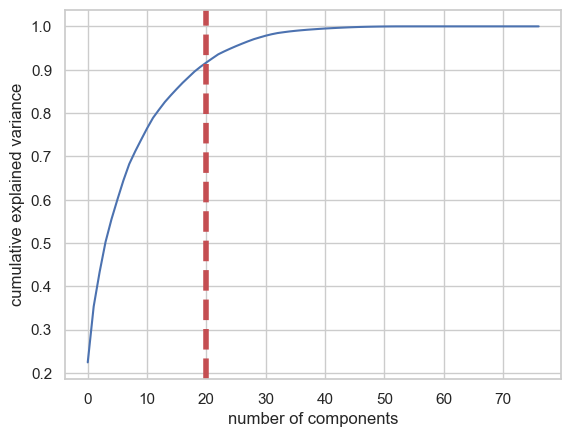

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


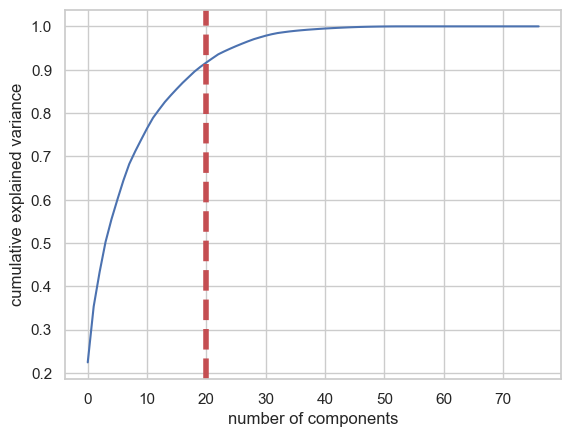

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


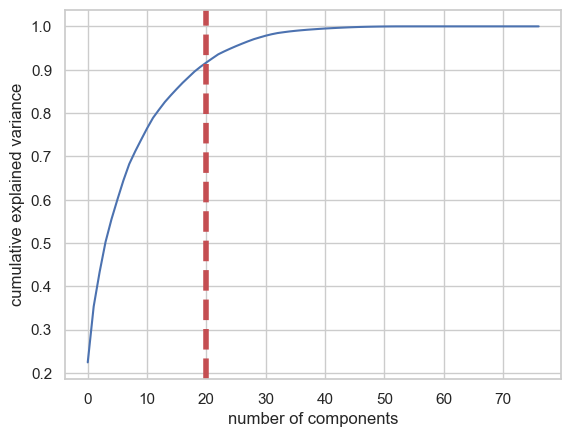

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    # Выбираем текущий столбец как целевую переменную
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca_test = PCA(n_components=77)
    pca_test.fit(X_train_scaled)
    sns.set(style='whitegrid')
    plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.axvline(linewidth=4, color='r', linestyle = '--', x=20, ymin=0, ymax=1)
    display(plt.show())
    evr = pca_test.explained_variance_ratio_
    cvr = np.cumsum(pca_test.explained_variance_ratio_)
    pca_df = pd.DataFrame()
    pca_df['Cumulative Variance Ratio'] = cvr
    pca_df['Explained Variance Ratio'] = evr
    display(pca_df.head(20))

avgInterAudioPlayedDelay


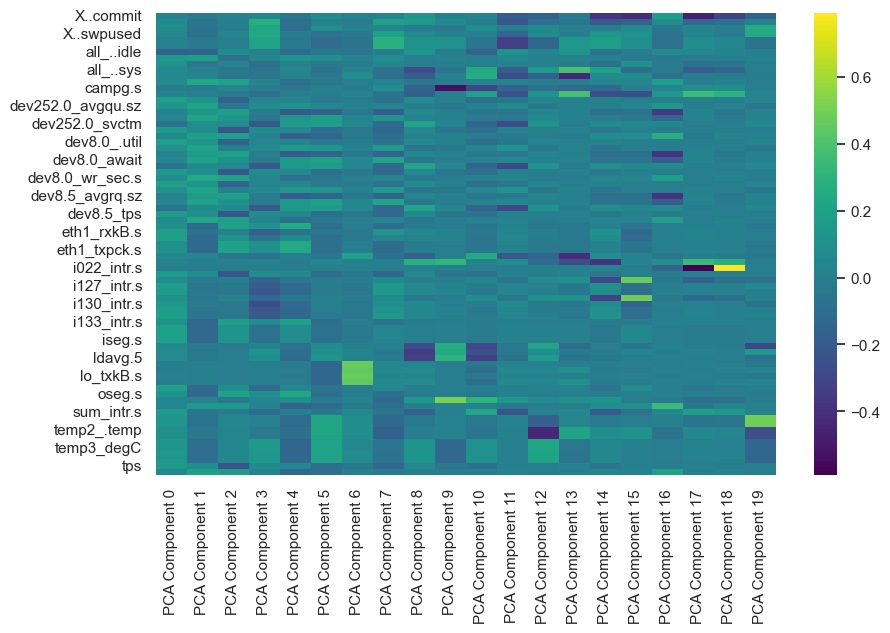

avgInterAudioPlayedDelay
NetReadBytes


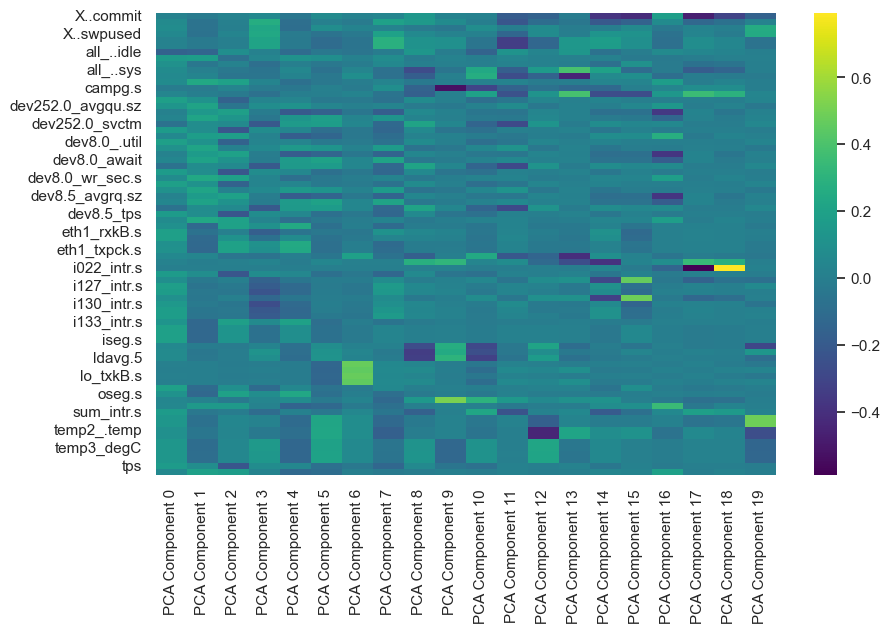

NetReadBytes
DispFrames


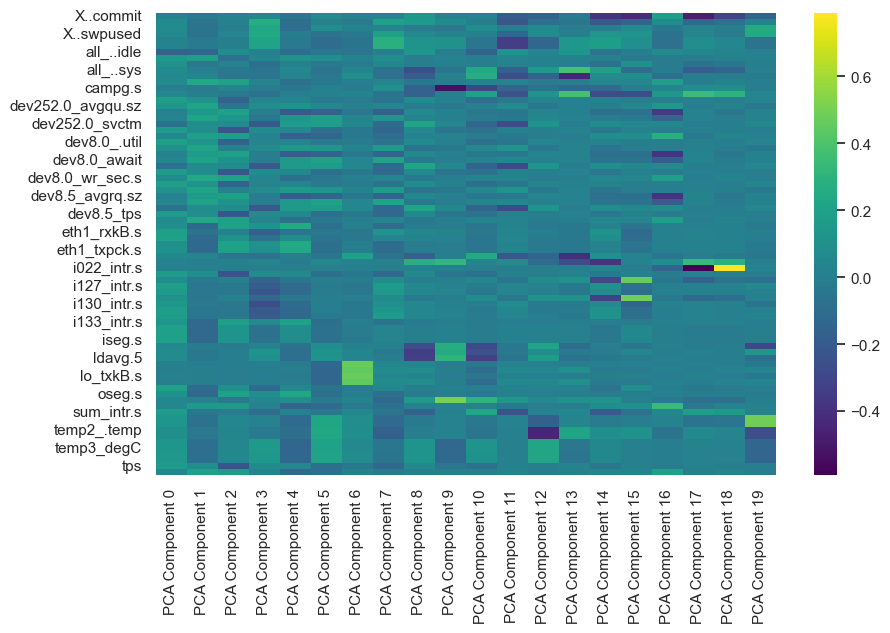

DispFrames
Metrics for column "avgInterAudioPlayedDelay":
Mean Absolute Error: 0.008637515708217242
Mean Squared Error: 0.0007016650337970411
Root Mean Squared Error: 0.026488960602429102


Metrics for column "NetReadBytes":
Mean Absolute Error: 37152.39715206951
Mean Squared Error: 2513755352.5487843
Root Mean Squared Error: 50137.36483451024


Metrics for column "DispFrames":
Mean Absolute Error: 2.917391950605991
Mean Squared Error: 16.7527169695861
Root Mean Squared Error: 4.093008303141603




In [15]:
# Создаем пустой словарь для хранения метрик для каждого столбца
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Y_metrics_dict = {}
Y_models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    print(column)
    # Выбираем текущий столбец как целевую переменную
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    evr = pca.explained_variance_ratio_
    cvr = np.cumsum(pca.explained_variance_ratio_)
    pca_df = pd.DataFrame()
    pca_df['Cumulative Variance Ratio'] = cvr
    pca_df['Explained Variance Ratio'] = evr
    
    
    pca_dims = []
    for x in range(len(pca_df)):
        pca_dims.append('PCA Component {}'.format(x))
    pca_df = pd.DataFrame(pca.components_, columns=data.columns, index=pca_dims)
    #print(pca_test_df.head(10).T)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pca_df.T, cmap='viridis')
    plt.show()

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Обучаем модель
    regressor.fit(X_train_scaled_pca, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'pca_model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test_scaled_pca)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')

In [16]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Определение диапазона гиперпараметров для RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(range(5, 15)),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    'bootstrap': [True, False]
}

# Инициализация переменных для хранения результатов
best_params_dict = {}

# Итерация по столбцам в Y_data
for column in Y_data.columns:
    print(f"Обработка столбца {column}")

    # Подготовка данных
    X = data
    y = Y_data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)

    # RandomizedSearchCV
    rfc = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=rfc, 
        param_distributions=param_dist, 
        n_iter=100, 
        cv=3, 
        verbose=2, 
        n_jobs=-1, 
        random_state=42
    )
    random_search.fit(X_train_scaled_pca, y_train)

    # Сохранение лучших параметров
    best_params = random_search.best_params_
    best_params_dict[column] = best_params
    print(f"Лучшие параметры для {column}: {best_params}")

Обработка столбца avgInterAudioPlayedDelay
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры для avgInterAudioPlayedDelay: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
Обработка столбца NetReadBytes
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры для NetReadBytes: {'n_estimators': 500, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Обработка столбца DispFrames
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры для DispFrames: {'n_estimators': 500, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [18]:
from sklearn.model_selection import GridSearchCV

# Уточненный диапазон параметров для GridSearchCV
param_grid = {
    'n_estimators': [380, 400, 420, 480, 500, 520],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 5, 12, 13, 14],
    'min_samples_leaf': [2, 3, 4, 13, 14, 15],
    'bootstrap': [True, False]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=3, 
    verbose=2, 
    n_jobs=-1
)

# Применение GridSearchCV для каждого столбца в Y_data
for column in Y_data.columns:
    print(f"Обработка столбца {column}")

    # Подготовка данных
    X = data
    y = Y_data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)

    # Обучение GridSearchCV
    grid_search.fit(X_train_scaled_pca, y_train)

    # Получение и вывод лучших параметров
    best_params = grid_search.best_params_
    print(f"Лучшие параметры для {column}: {best_params}")


Обработка столбца avgInterAudioPlayedDelay
Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
Лучшие параметры для avgInterAudioPlayedDelay: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 520}
Обработка столбца NetReadBytes
Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
Лучшие параметры для NetReadBytes: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}
Обработка столбца DispFrames
Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
Лучшие параметры для DispFrames: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 380}


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}
scalers_dict = {}
pcas_dict = {}

# Словарь лучших параметров для каждого столбца
best_params = {
    'avgInterAudioPlayedDelay': {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 520},
    'NetReadBytes': {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400},
    'DispFrames': {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 380}
}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    print(column)
    params = best_params[column]
    # Выбираем текущий столбец как целевую переменную
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scalers_dict[column] = scaler
    joblib.dump(scaler, f'scaler_{column}.joblib')

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    pcas_dict[column] = pca
    joblib.dump(pca, f'pca_{column}.joblib')

    # Инициализируем модель с новыми параметрами
    regressor = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        bootstrap=params['bootstrap'],
        max_depth=params['max_depth'],
        max_features=params['max_features'],
        min_samples_leaf=params['min_samples_leaf'],
        min_samples_split=params['min_samples_split'],
        random_state=42
    )

    # Обучаем модель
    regressor.fit(X_train_scaled_pca, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_hyper_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test_scaled_pca)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


avgInterAudioPlayedDelay
NetReadBytes
DispFrames
Metrics for column "avgInterAudioPlayedDelay":
Mean Absolute Error: 0.007139640581164878
Mean Squared Error: 0.00044098876943501864
Root Mean Squared Error: 0.020999732603893286


Metrics for column "NetReadBytes":
Mean Absolute Error: 36786.774449883895
Mean Squared Error: 2498822075.15722
Root Mean Squared Error: 49988.21936373829


Metrics for column "DispFrames":
Mean Absolute Error: 2.81359523250729
Mean Squared Error: 16.35761525862269
Root Mean Squared Error: 4.044454877807724




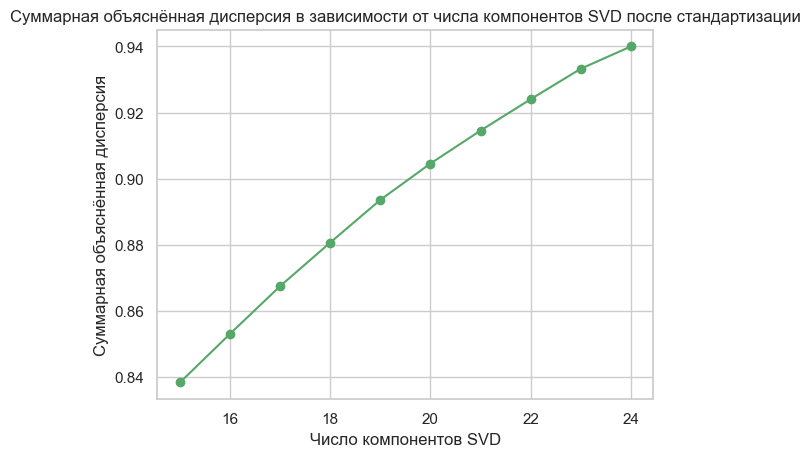

In [19]:
# НЕ ЗАБУДЬ ОБУЧИТЬ НА ДАННЫХ СВЕРХУ
# без пропусков в данных
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Стандартизация данных перед применением SVD
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Список для хранения ошибок восстановления для SVD после стандартизации
# Подготовка списка для хранения объяснённой дисперсии для SVD
explained_variance_ratio_svd = []

for n_components in range(15, 25):
    svd = TruncatedSVD(n_components=n_components, random_state=0)
    svd.fit(data_scaled)  # Обучение SVD на стандартизированных данных
    explained_variance_ratio_svd.append(svd.explained_variance_ratio_.sum())  # Суммарная объяснённая дисперсия
    
    #print(f"SVD после стандартизации - Количество компонент: {n_components}, Суммарная объяснённая дисперсия: {svd.explained_variance_ratio_.sum()}")

# Визуализация суммарной объяснённой дисперсии для SVD после стандартизации
plt.figure()
plt.plot(range(15, 25), explained_variance_ratio_svd, marker='o', color='g')
plt.xlabel('Число компонентов SVD')
plt.ylabel('Суммарная объяснённая дисперсия')
plt.title('Суммарная объяснённая дисперсия в зависимости от числа компонентов SVD после стандартизации')
plt.grid(True)
plt.show()
# 19 компонент

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}
scalers_dict = {}
svds_dict = {}  # Словарь для хранения SVD моделей

# Словарь лучших параметров для каждой целевой переменной
best_params = {
    'avgInterAudioPlayedDelay': {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 520},
    'NetReadBytes': {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400},
    'DispFrames': {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 380}
}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    print(column)
    # Получаем параметры для текущей целевой переменной
    params = best_params.get(column, {})
    
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # Стандартизация данных
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scalers_dict[column] = scaler
    joblib.dump(scaler, f'scaler_{column}.joblib')

    # Применение SVD
    svd = TruncatedSVD(n_components=19)
    svd.fit(X_train_scaled)
    X_train_scaled_svd = svd.transform(X_train_scaled)
    X_test_scaled_svd = svd.transform(X_test_scaled)
    svds_dict[column] = svd
    joblib.dump(svd, f'svd_{column}.joblib')

    # Инициализируем и обучаем модель RandomForestRegressor с новыми параметрами
    regressor = RandomForestRegressor(
        n_estimators=params.get('n_estimators', 100),  # Значение по умолчанию, если нет в словаре
        bootstrap=params.get('bootstrap', True),
        max_depth=params.get('max_depth', None),
        max_features=params.get('max_features', 'auto'),
        min_samples_leaf=params.get('min_samples_leaf', 1),
        min_samples_split=params.get('min_samples_split', 2),
        random_state=42
    )
    regressor.fit(X_train_scaled_svd, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_hyper_{column}.joblib')

    # Делаем прогноз на тестовом наборе с использованием преобразованных через SVD данных
    y_pred = regressor.predict(X_test_scaled_svd)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


avgInterAudioPlayedDelay
NetReadBytes
DispFrames
Metrics for column "avgInterAudioPlayedDelay":
Mean Absolute Error: 0.007154644625120928
Mean Squared Error: 0.00044125072749966486
Root Mean Squared Error: 0.021005968854105845


Metrics for column "NetReadBytes":
Mean Absolute Error: 36913.52586555963
Mean Squared Error: 2516586123.583213
Root Mean Squared Error: 50165.587045136956


Metrics for column "DispFrames":
Mean Absolute Error: 2.824500643903377
Mean Squared Error: 16.54602830599929
Root Mean Squared Error: 4.067680949386184




In [ ]:
*** до сюда повторение ***

In [11]:
Y_metrics_df = pd.DataFrame.from_dict(Y_metrics_dict, orient='index')
Y_metrics_df.to_csv('Y_metrics.csv', sep=';')

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
print(normalized_data)
eps = 0.5
min_samples = 5

# Применение DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(normalized_data)

[[0.         0.         0.         ... 0.02515337 0.25409836 0.        ]
 [0.         0.01319648 0.         ... 0.00858896 0.         0.        ]
 [0.         0.01173021 0.         ... 0.01288344 0.         0.        ]
 ...
 [0.80952381 0.99853372 0.29168901 ... 0.05398773 0.         0.        ]
 [0.80952381 0.99853372 0.29168901 ... 0.02331288 0.         0.        ]
 [0.80952381 0.99706745 0.29168901 ... 0.04601227 0.         0.        ]]


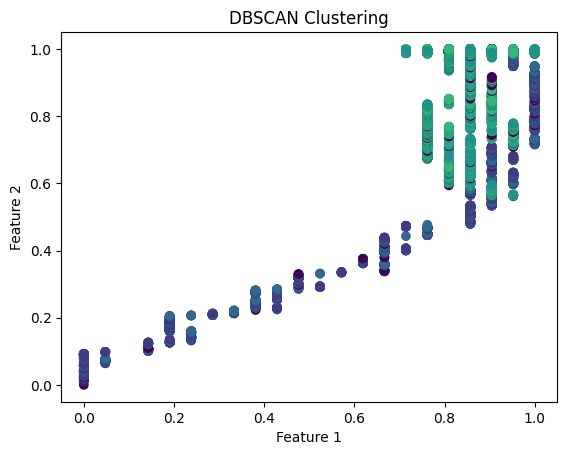

         X..commit  X..memused  X..swpcad  X..swpused   
cluster                                                 
-1       27.528402   98.477727  33.237351    0.657628  \
 0       27.500045   96.121442  16.895434    0.300000   
 1       27.499070   96.103025  16.895391    0.300000   
 2       27.540162   99.236563  37.589834    0.766935   
 3       27.539979   99.251033  37.539357    0.767505   
 4       27.560000   99.613333  51.863333    0.760000   
 5       27.560000   99.598571  51.857143    0.760000   

         X.dev.mapper.cloud..2.root_.fsused   
cluster                                       
-1                                52.411200  \
 0                                52.296831   
 1                                52.295514   
 2                                52.455258   
 3                                52.457454   
 4                                52.585000   
 5                                52.582857   

         X.dev.mapper.cloud..2.root_.ufsused  all_..idle  all_

In [6]:
# Визуализация результатов (для двумерных данных)
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Вывод информации о кластерах
cluster_info = data.groupby('cluster').mean()
print(cluster_info)


***ОЦЕНКА ВАЖНОСТИ ПРИЗНАКОВ***

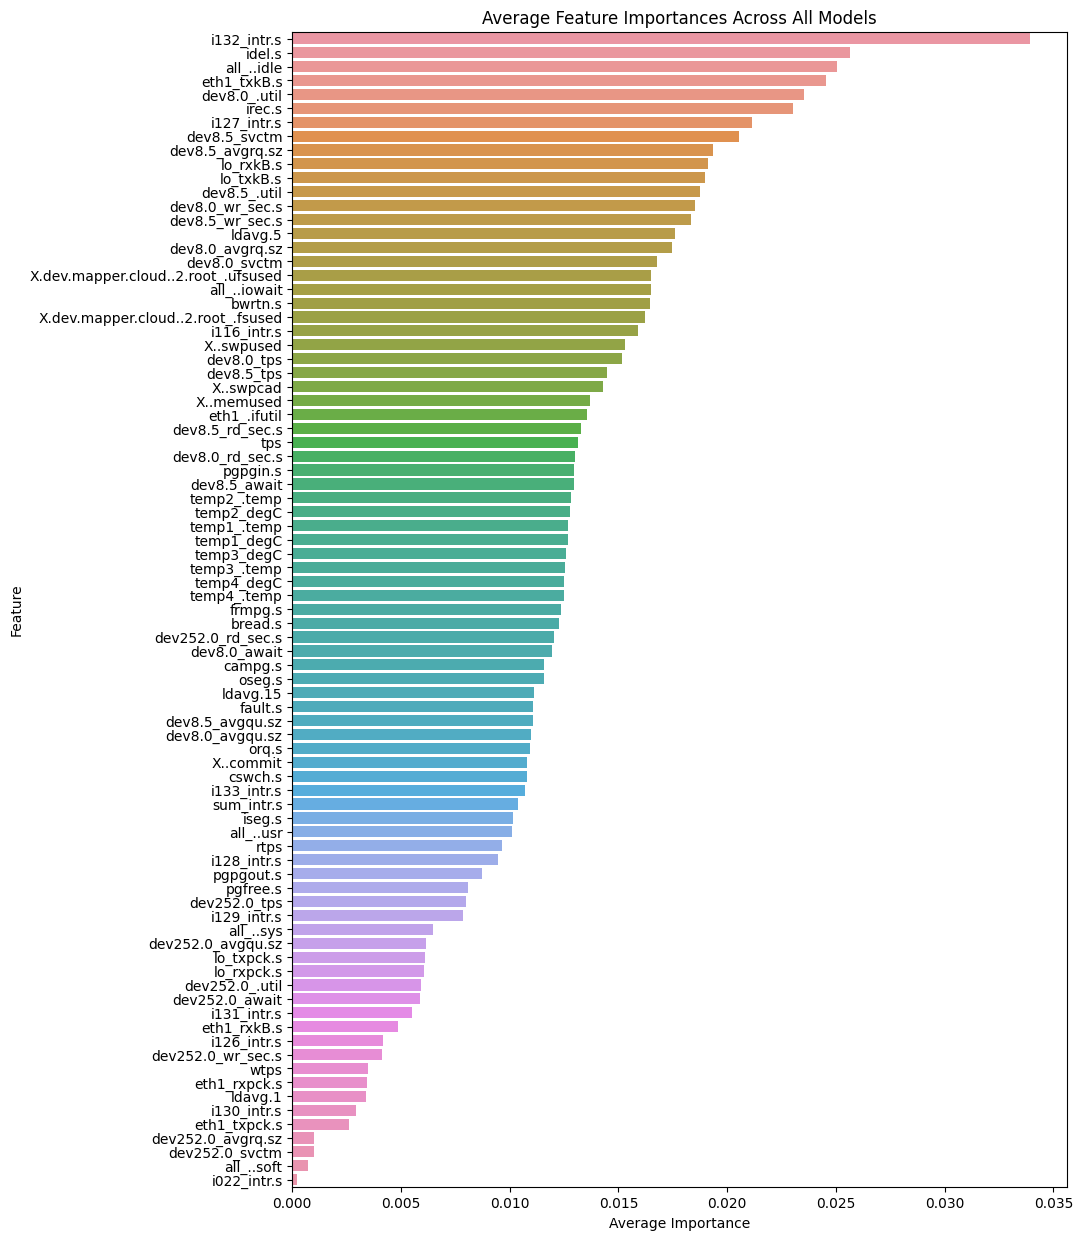

In [6]:
import os
from joblib import load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = list(data.columns)

# Словарь для хранения важности признаков из всех моделей
all_feature_importances = {feature: [] for feature in feature_names}

# Перебор всех файлов моделей в директории
# joblib.dump(regressor, f'model_{column}.joblib')
for column in feature_names:
    model = load(f'model_{column}.joblib')
    feature_importances = model.feature_importances_

    # Сохранение важности признаков
    feat = feature_names.copy()
    feat.remove(column)
    importance_df = pd.DataFrame({'Feature': feat, 'Importance': feature_importances})
    importance_df.to_csv(f'{column}_importance.csv', index=False)

    # Добавление важности в общий словарь
    for feature, importance in zip(feat, feature_importances):
        all_feature_importances[feature].append(importance)

    # Визуализация и сохранение графика
    plt.figure(figsize=(10, 15))
    sns.barplot(data=importance_df, y='Feature', x='Importance')
    plt.title(f'Feature Importances for {column}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.savefig(f'{column}_importance.png')
    plt.close()

# Анализ общей важности признаков
aggregate_importances = {feature: sum(importances)/len(importances) for feature, importances in all_feature_importances.items()}
aggregate_importance_df = pd.DataFrame(list(aggregate_importances.items()), columns=['Feature', 'Average Importance'])
aggregate_importance_df.sort_values(by='Average Importance', ascending=False, inplace=True)

# Сохранение и визуализация общей важности
aggregate_importance_df.to_csv('aggregate_importance.csv', index=False)
plt.figure(figsize=(10, 15))
sns.barplot(data=aggregate_importance_df, y='Feature', x='Average Importance')
plt.title('Average Feature Importances Across All Models')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.savefig('aggregate_importance.png')


In [9]:
import os
import pandas as pd

feature_names = list(data.columns)
feature_counts = {}

# Проход по всем файлам в директории
for column in feature_names:
    df = pd.read_csv(f'{column}_importance.csv')

    # Подсчет признаков с важностью выше 0.5
    for index, row in df.iterrows():
        if row['Importance'] > 0.5:
            feature = row['Feature']
            feature_counts[feature] = feature_counts.get(feature, 0) + 1

# Создание DataFrame из полученных данных
feature_importance_counts = pd.DataFrame(list(feature_counts.items()), columns=['Feature', 'Count'])
feature_importance_counts.sort_values(by='Count', ascending=False, inplace=True)

# Вывод результатов
print(feature_importance_counts.to_string(index=False))


                            Feature  Count
                        i132_intr.s      2
                             idel.s      2
                        eth1_txkB.s      2
                            ldavg.5      2
                       dev8.5_.util      2
                    dev8.5_avgrq.sz      2
                       dev8.5_svctm      2
                        i133_intr.s      1
                             irec.s      1
                           ldavg.15      1
                          lo_txkB.s      1
                          lo_rxkB.s      1
                             iseg.s      1
                         temp1_degC      1
                            cswch.s      1
                        i127_intr.s      1
                        temp1_.temp      1
                         temp2_degC      1
                        temp2_.temp      1
                         temp3_degC      1
                        temp3_.temp      1
                         temp4_degC      1
           

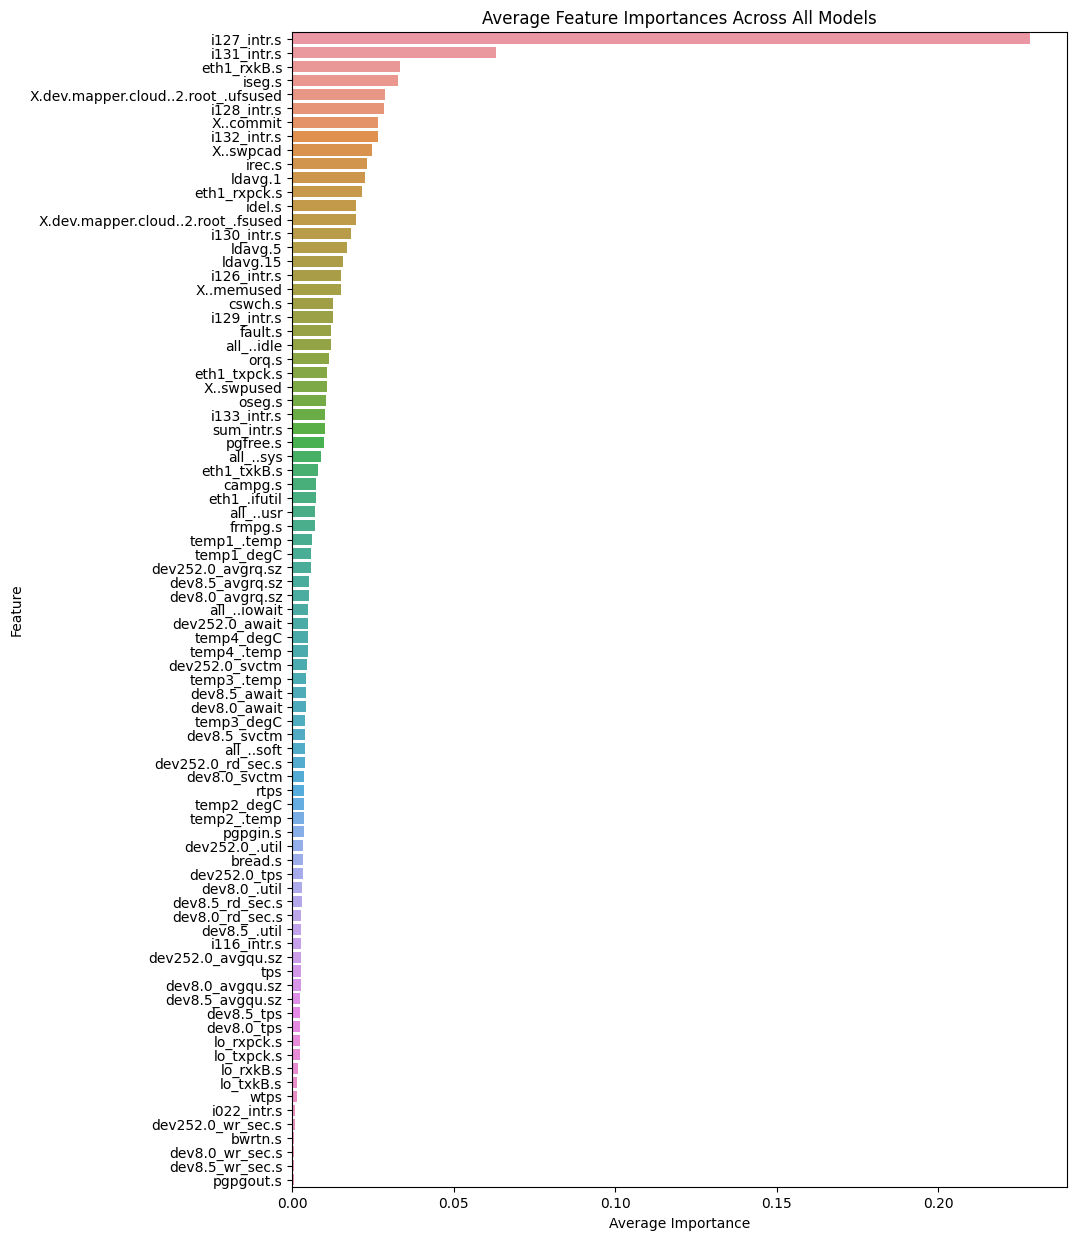

In [5]:
import os
from joblib import load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = list(data.columns)

# Словарь для хранения важности признаков из всех моделей
all_feature_importances = {feature: [] for feature in feature_names}

# Перебор всех файлов моделей в директории
# joblib.dump(regressor, f'model_{column}.joblib')
for column in Y_data.columns:
    model = load(f'model_{column}.joblib')
    feature_importances = model.feature_importances_

    # Сохранение важности признаков
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df.to_csv(f'{column}_importance.csv', index=False)

    # Добавление важности в общий словарь
    for feature, importance in zip(feature_names, feature_importances):
        all_feature_importances[feature].append(importance)

    # Визуализация и сохранение графика
    plt.figure(figsize=(10, 15))
    sns.barplot(data=importance_df, y='Feature', x='Importance')
    plt.title(f'Feature Importances for {column}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.savefig(f'{column}_importance.png')
    plt.close()

# Анализ общей важности признаков
aggregate_importances = {feature: sum(importances)/len(importances) for feature, importances in all_feature_importances.items()}
aggregate_importance_df = pd.DataFrame(list(aggregate_importances.items()), columns=['Feature', 'Average Importance'])
aggregate_importance_df.sort_values(by='Average Importance', ascending=False, inplace=True)

# Сохранение и визуализация общей важности
aggregate_importance_df.to_csv('aggregate_importance.csv', index=False)
plt.figure(figsize=(10, 15))
sns.barplot(data=aggregate_importance_df, y='Feature', x='Average Importance')
plt.title('Average Feature Importances Across All Models')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.savefig('aggregate_importance.png')


***Объяснённая дисперсия, PCA и тд***

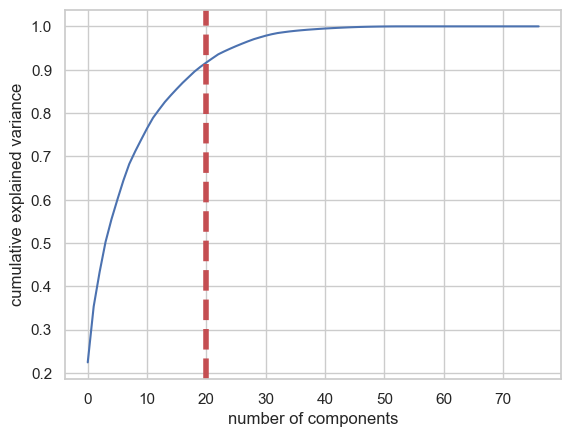

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


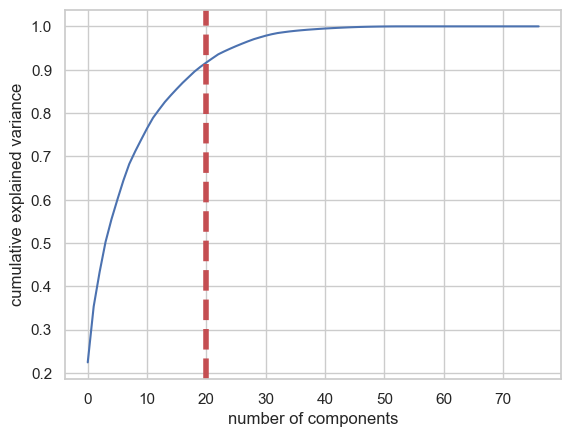

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


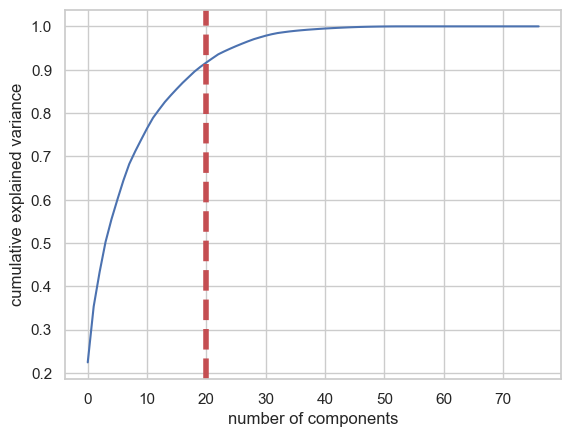

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


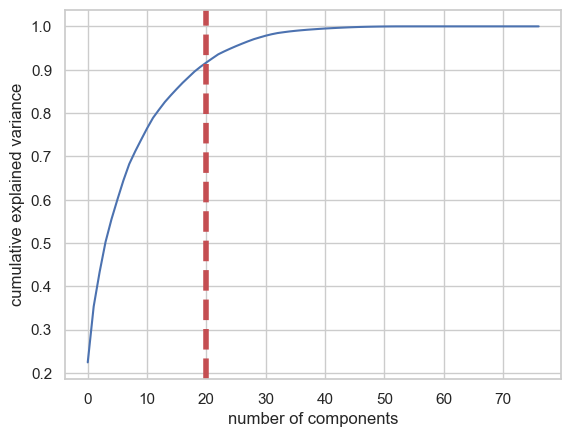

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


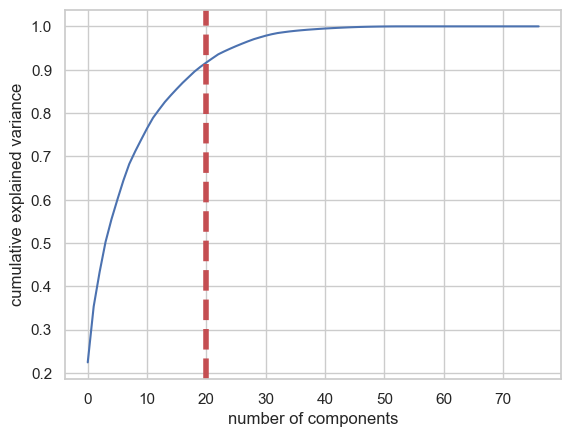

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


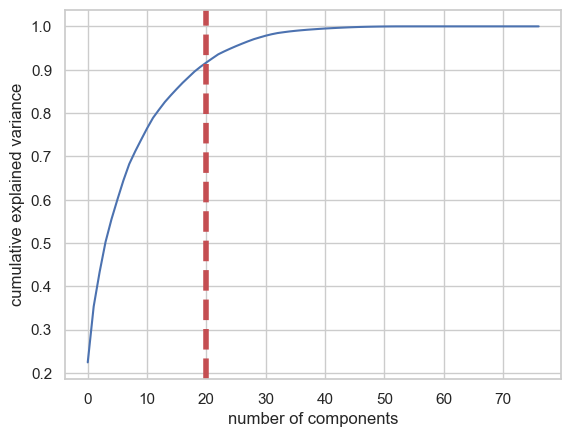

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


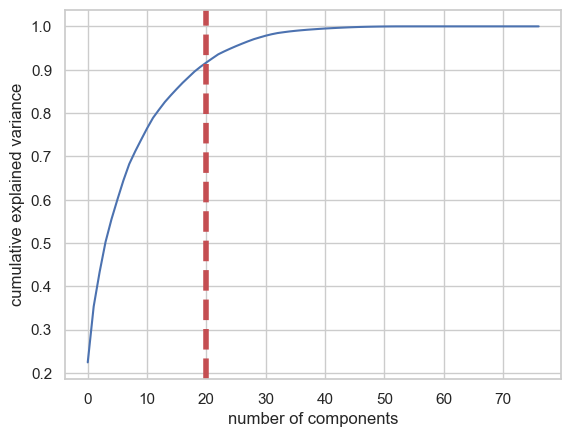

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


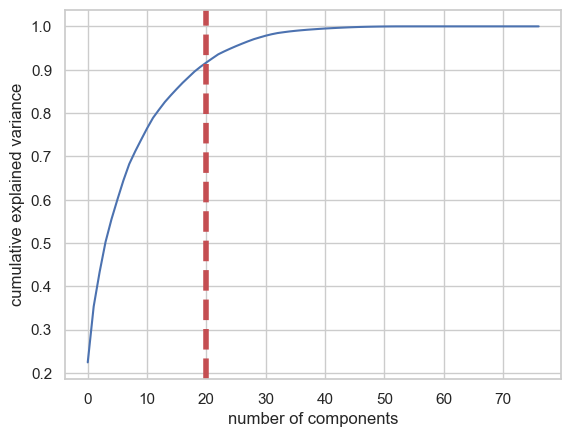

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


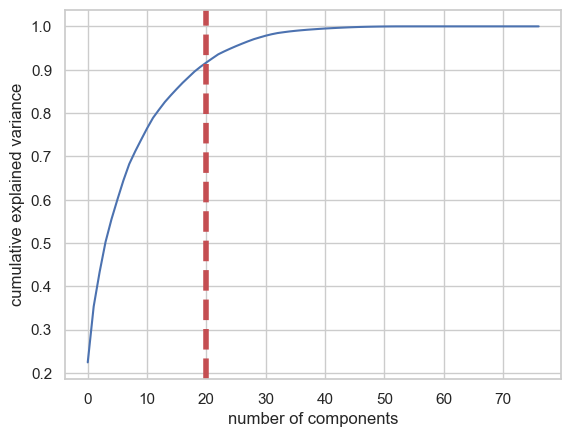

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


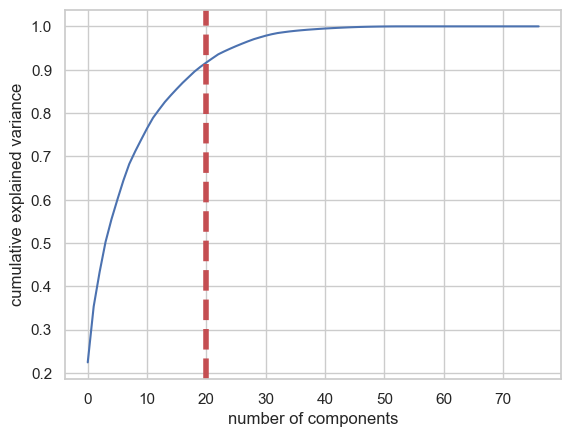

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


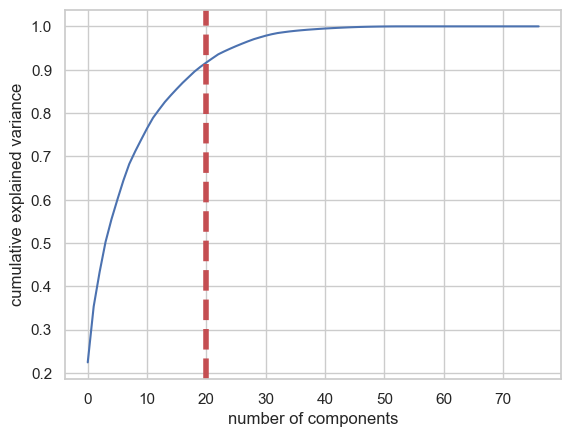

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


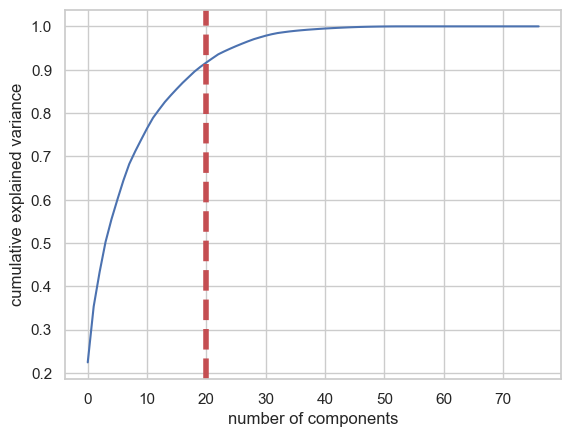

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


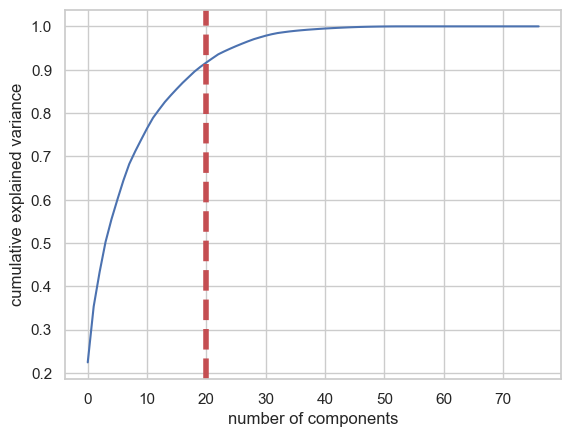

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


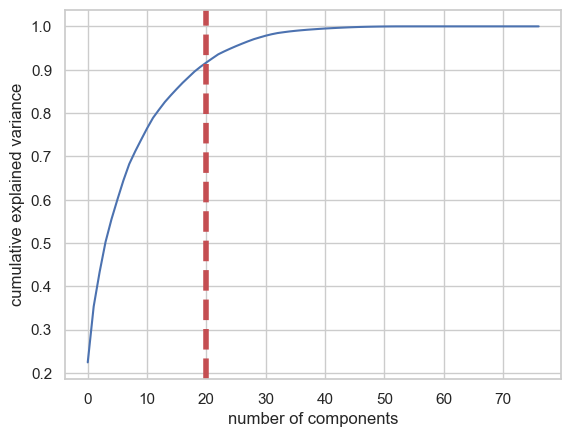

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.224175,0.224175
1,0.353187,0.129012
2,0.432714,0.079526
3,0.502272,0.069559
4,0.554618,0.052346
5,0.600119,0.045501
6,0.643820,0.043701
7,0.682385,0.038565
8,0.711438,0.029052
9,0.738287,0.026849


'\n    # Инициализируем модель\n    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)\n\n    # Обучаем модель\n    regressor.fit(X_train, y_train)\n    Y_models_dict[column] = regressor\n    joblib.dump(regressor, f\'model_{column}.joblib\')\n\n    # Делаем прогноз на тестовом наборе\n    y_pred = regressor.predict(X_test)\n\n    # Вычисляем метрики и сохраняем их в словарь\n    Y_metrics_dict[column] = {\n        \'Mean Absolute Error\': metrics.mean_absolute_error(y_test, y_pred),\n        \'Mean Squared Error\': metrics.mean_squared_error(y_test, y_pred),\n        \'Root Mean Squared Error\': np.sqrt(metrics.mean_squared_error(y_test, y_pred))\n    }\n    print(column)\n\n# Выводим метрики для каждого столбца\nfor column, metrics in Y_metrics_dict.items():\n    print(f\'Metrics for column "{column}":\')\n    for metric_name, metric_value in metrics.items():\n        print(f\'{metric_name}: {metric_value}\')\n    print(\'\n\')'

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    # Выбираем текущий столбец как целевую переменную
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca_test = PCA(n_components=77)
    pca_test.fit(X_train_scaled)
    sns.set(style='whitegrid')
    plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.axvline(linewidth=4, color='r', linestyle = '--', x=20, ymin=0, ymax=1)
    display(plt.show())
    evr = pca_test.explained_variance_ratio_
    cvr = np.cumsum(pca_test.explained_variance_ratio_)
    pca_df = pd.DataFrame()
    pca_df['Cumulative Variance Ratio'] = cvr
    pca_df['Explained Variance Ratio'] = evr
    display(pca_df.head(20))
    

'''
    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Обучаем модель
    regressor.fit(X_train, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')'''


LostFrames


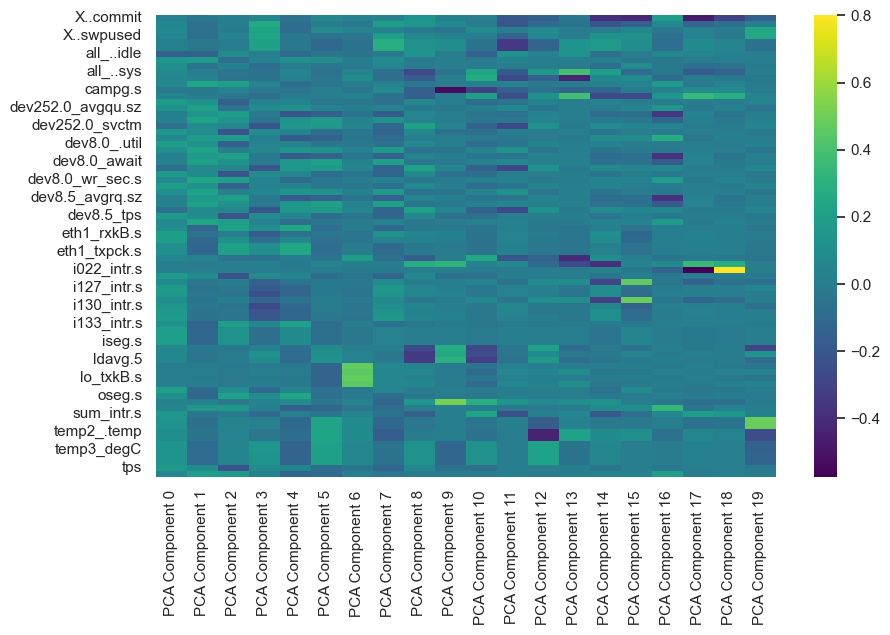

LostFrames
noAudioPlayed


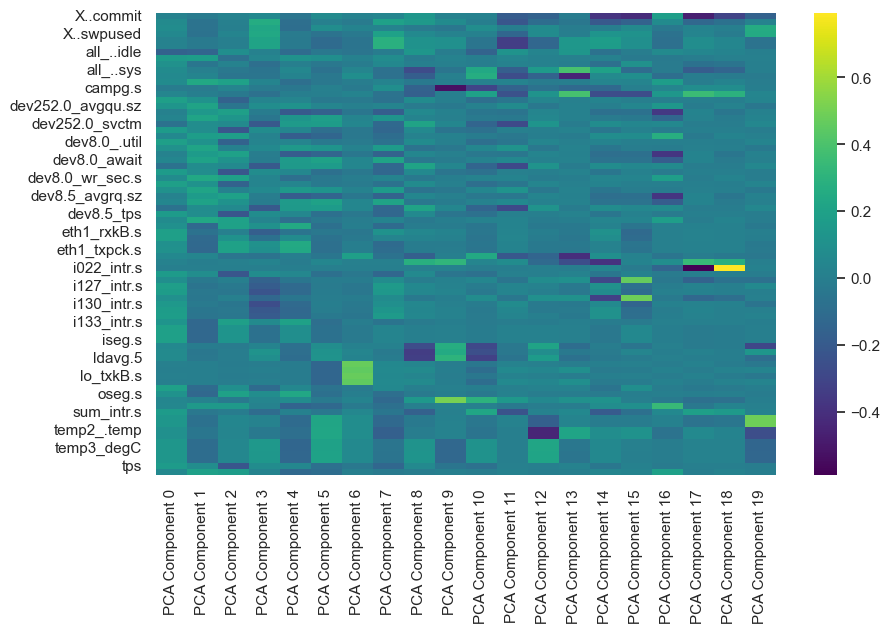

noAudioPlayed
avgInterAudioPlayedDelay


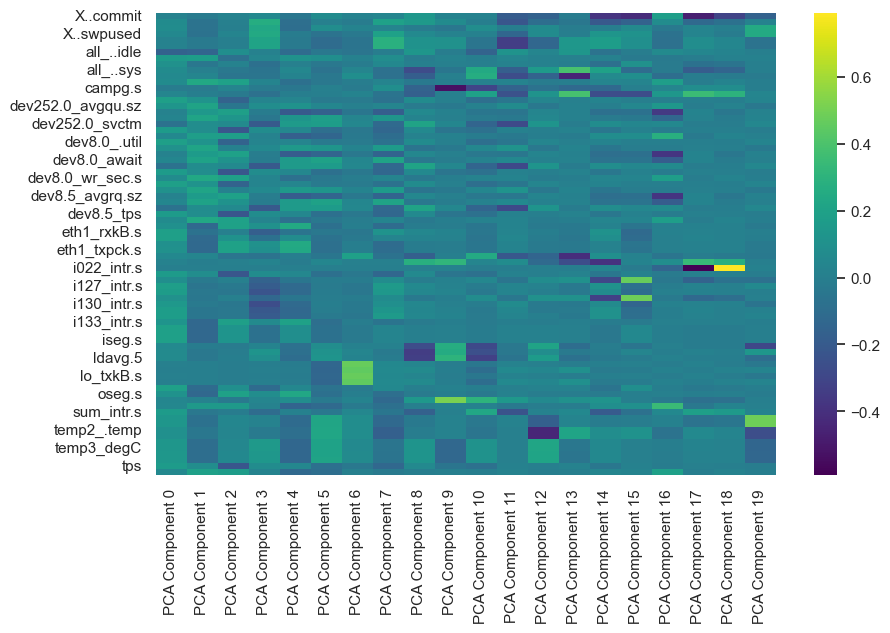

avgInterAudioPlayedDelay
NetReadOperations


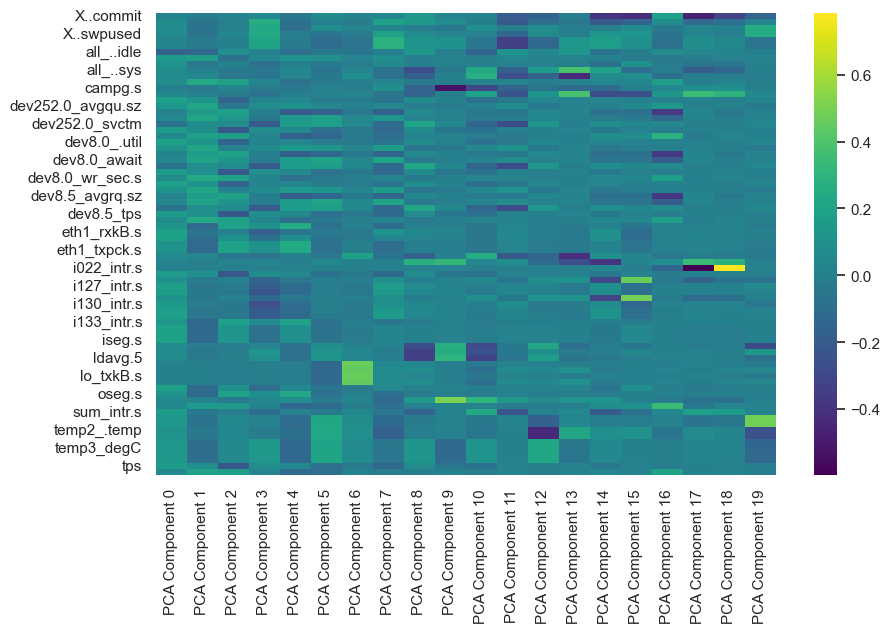

NetReadOperations
NetReadBytes


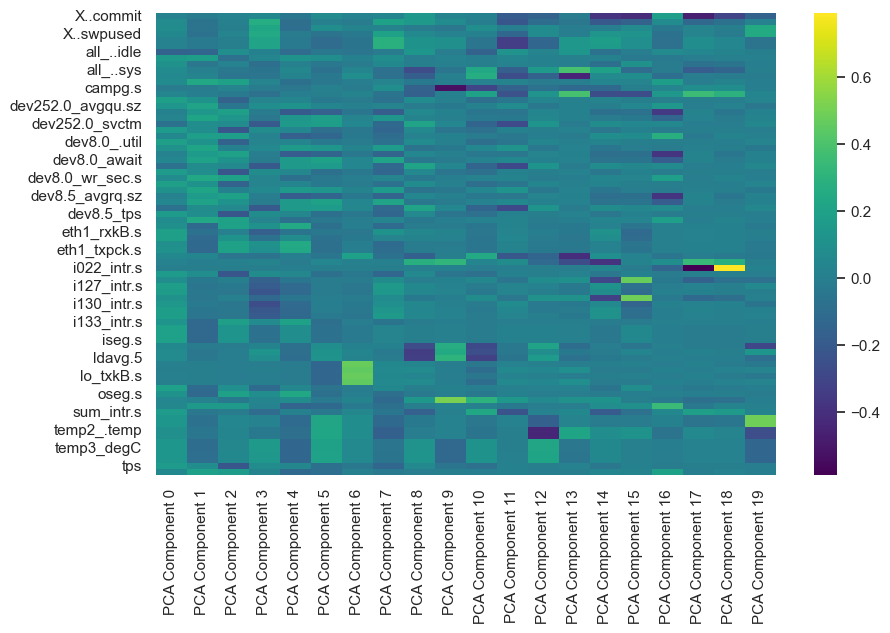

NetReadBytes
NetReadAvgDelay


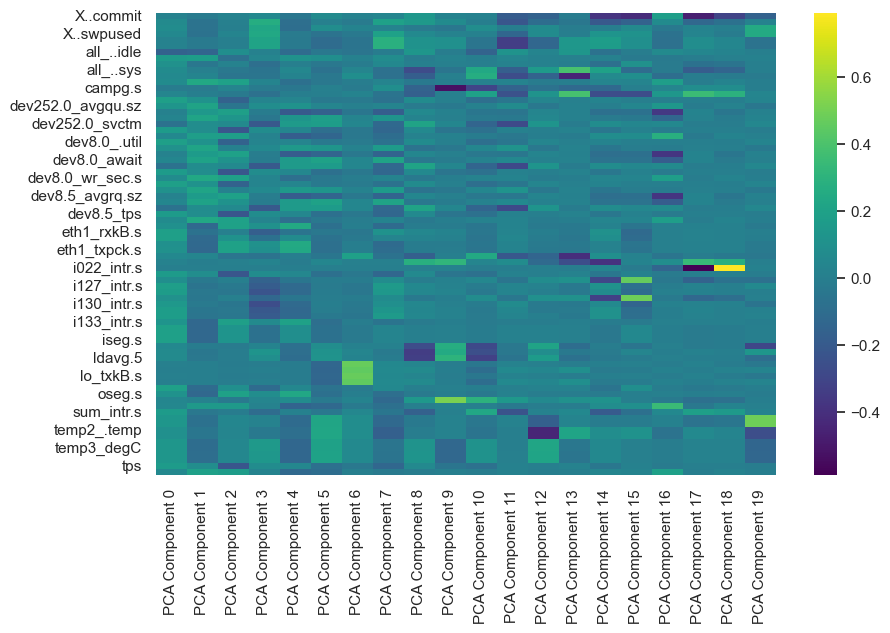

NetReadAvgDelay
noAudioLost


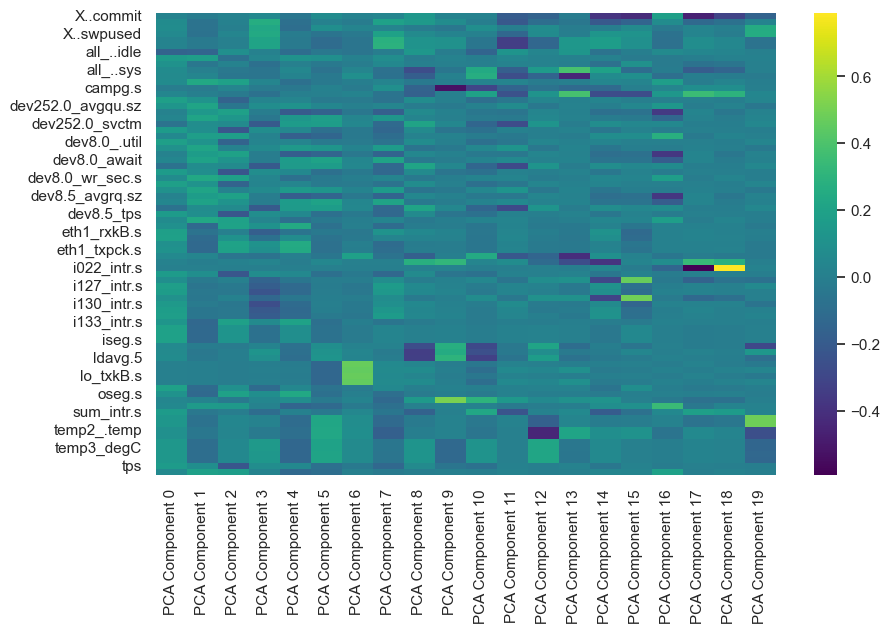

noAudioLost
noAudioLate


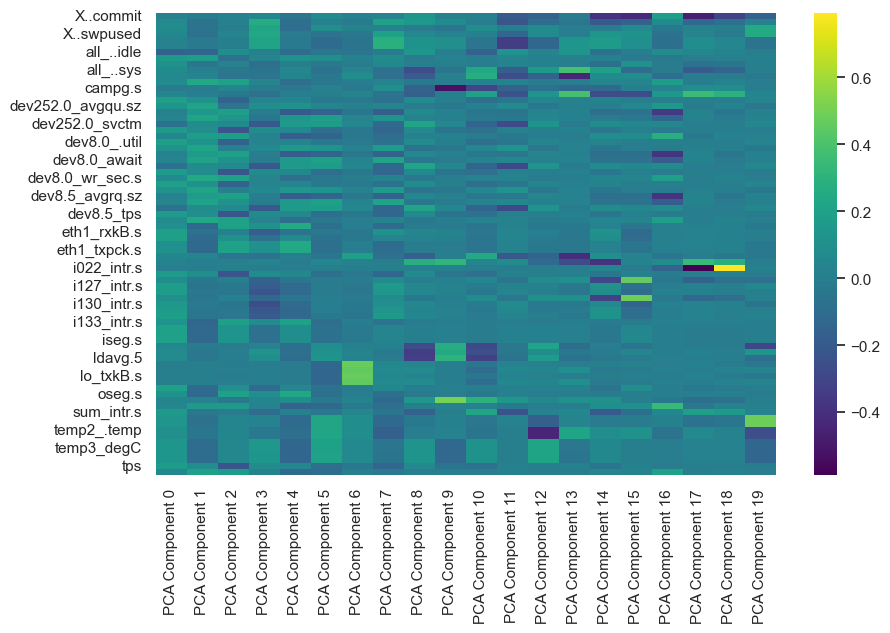

noAudioLate
NoRTPPkts


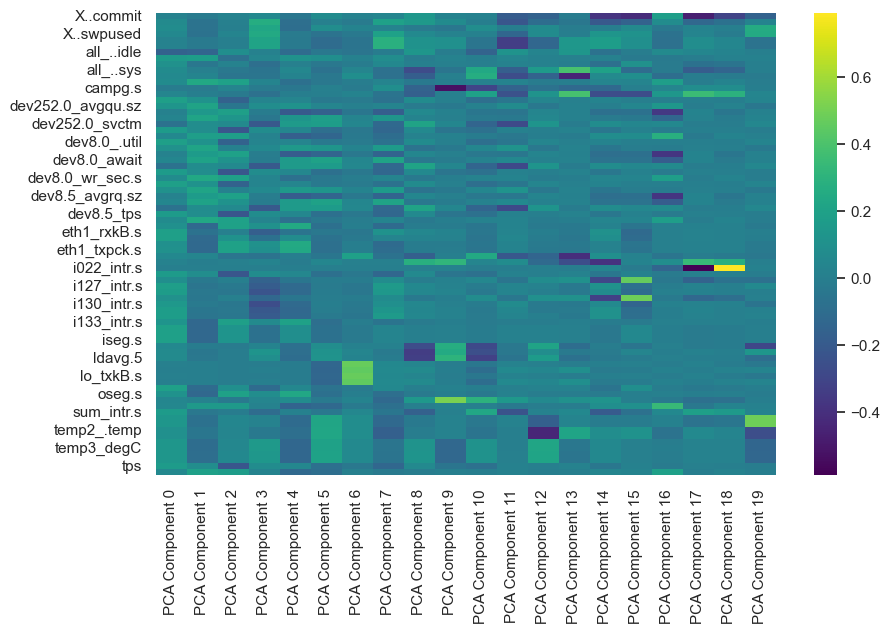

NoRTPPkts
AvgRTPInterPktDelay


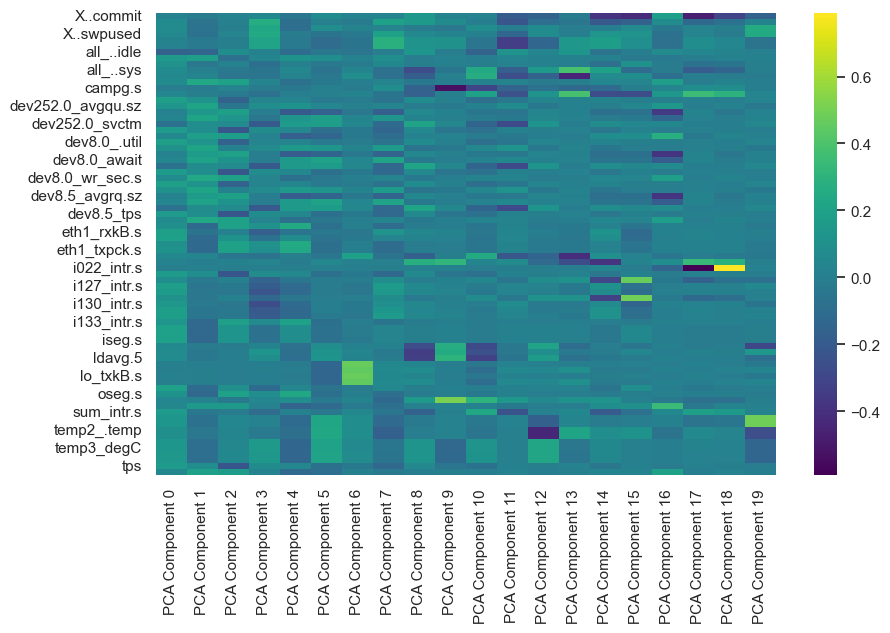

AvgRTPInterPktDelay
LostRTPPkts


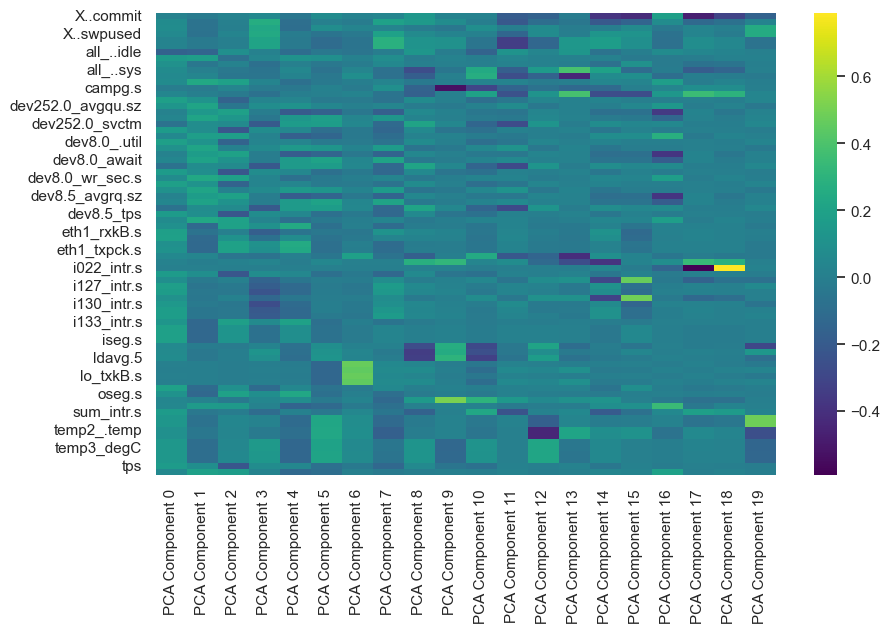

LostRTPPkts
AvgRTPJitter


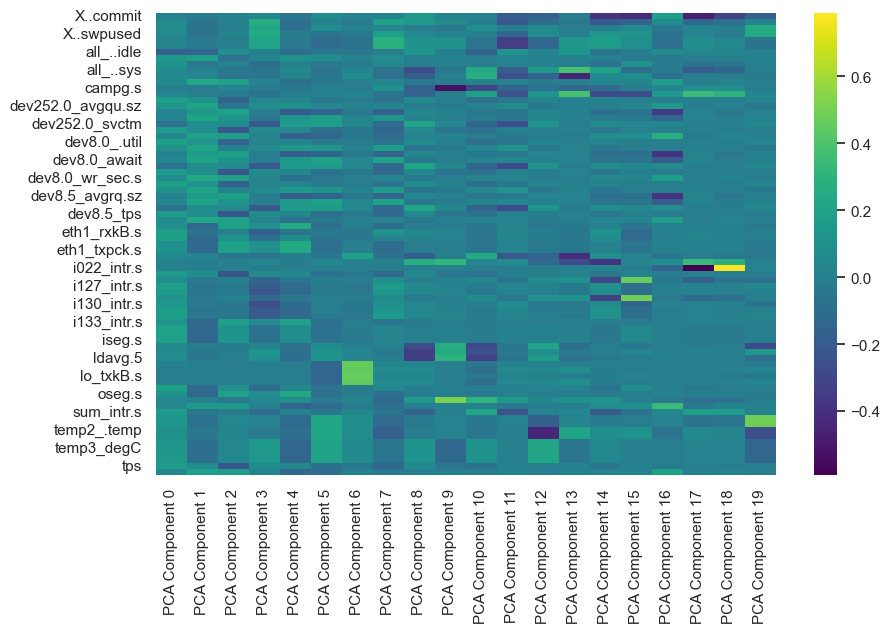

AvgRTPJitter
DispFrames


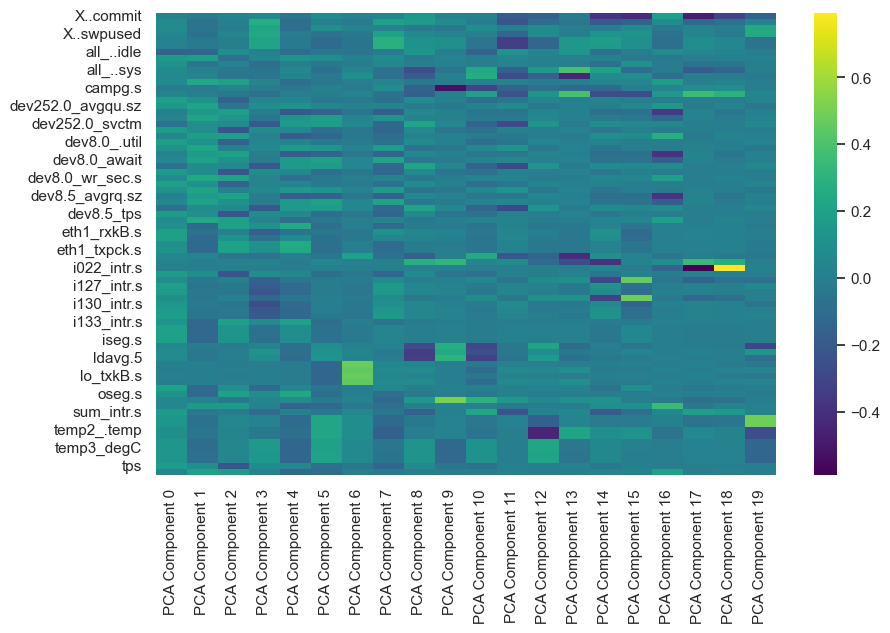

DispFrames
AvgInterDispDelay


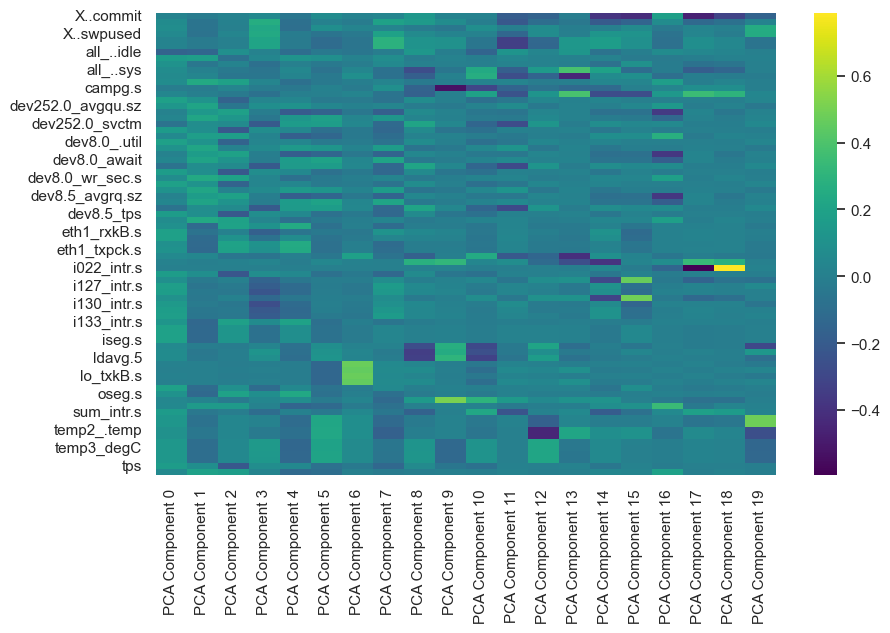

AvgInterDispDelay
Metrics for column "LostFrames":
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


Metrics for column "noAudioPlayed":
Mean Absolute Error: 10.490345872398812
Mean Squared Error: 250.07663869963412
Root Mean Squared Error: 15.813811643611862


Metrics for column "avgInterAudioPlayedDelay":
Mean Absolute Error: 0.008920459381285835
Mean Squared Error: 0.0008575581727919197
Root Mean Squared Error: 0.029284094194492676


Metrics for column "NetReadOperations":
Mean Absolute Error: 83.29694911959754
Mean Squared Error: 14149.481170553281
Root Mean Squared Error: 118.95159171088582


Metrics for column "NetReadBytes":
Mean Absolute Error: 37125.90899554083
Mean Squared Error: 2512883249.7439756
Root Mean Squared Error: 50128.66694561083


Metrics for column "NetReadAvgDelay":
Mean Absolute Error: 0.0031662372913378216
Mean Squared Error: 3.6504085711719875e-05
Root Mean Squared Error: 0.00604186111324316


Metrics for column "noAudioLost":
Me

In [7]:
# Создаем пустой словарь для хранения метрик для каждого столбца
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Y_metrics_dict = {}
Y_models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    print(column)
    # Выбираем текущий столбец как целевую переменную
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    evr = pca.explained_variance_ratio_
    cvr = np.cumsum(pca.explained_variance_ratio_)
    pca_df = pd.DataFrame()
    pca_df['Cumulative Variance Ratio'] = cvr
    pca_df['Explained Variance Ratio'] = evr
    
    
    pca_dims = []
    for x in range(len(pca_df)):
        pca_dims.append('PCA Component {}'.format(x))
    pca_df = pd.DataFrame(pca.components_, columns=data.columns, index=pca_dims)
    #print(pca_test_df.head(10).T)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pca_df.T, cmap='viridis')
    plt.show()

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Обучаем модель
    regressor.fit(X_train_scaled_pca, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'pca_model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test_scaled_pca)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


In [8]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Определение диапазона гиперпараметров для RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(range(5, 15)),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    'bootstrap': [True, False]
}

# Инициализация переменных для хранения результатов
best_params_dict = {}

# Итерация по столбцам в Y_data
for column in Y_data.columns:
    print(f"Обработка столбца {column}")

    # Подготовка данных
    X = data
    y = Y_data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)

    # RandomizedSearchCV
    rfc = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=rfc, 
        param_distributions=param_dist, 
        n_iter=100, 
        cv=3, 
        verbose=2, 
        n_jobs=-1, 
        random_state=42
    )
    random_search.fit(X_train_scaled_pca, y_train)

    # Сохранение лучших параметров
    best_params = random_search.best_params_
    best_params_dict[column] = best_params
    print(f"Лучшие параметры для {column}: {best_params}")

Обработка столбца LostFrames
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры для LostFrames: {'n_estimators': 900, 'min_samples_split': 11, 'min_samples_leaf': 13, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Обработка столбца noAudioPlayed
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры для noAudioPlayed: {'n_estimators': 500, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Обработка столбца avgInterAudioPlayedDelay
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры для avgInterAudioPlayedDelay: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
Обработка столбца NetReadOperations
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры для NetReadOperations: {'n_estimators': 500, 'min_samples_split': 13, 'min_samp

In [9]:
from sklearn.model_selection import GridSearchCV

# Уточненный диапазон параметров для GridSearchCV
param_grid = {
    'n_estimators': [400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600],
    'max_features': ['log2'],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [10, 11, 12, 13, 14, 15, 16],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'bootstrap': [False]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=3, 
    verbose=2, 
    n_jobs=-1
)

# Применение GridSearchCV для каждого столбца в Y_data
for column in Y_data.columns:
    print(f"Обработка столбца {column}")

    # Подготовка данных
    X = data
    y = Y_data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)

    # Обучение GridSearchCV
    grid_search.fit(X_train_scaled_pca, y_train)

    # Получение и вывод лучших параметров
    best_params = grid_search.best_params_
    print(f"Лучшие параметры для {column}: {best_params}")


Обработка столбца ReadsAvg
Fitting 3 folds for each of 1540 candidates, totalling 4620 fits
Лучшие параметры для ReadsAvg: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 460}
Обработка столбца WritesAvg
Fitting 3 folds for each of 1540 candidates, totalling 4620 fits
Лучшие параметры для WritesAvg: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 580}


In [11]:
from sklearn.model_selection import GridSearchCV

# Уточненный диапазон параметров для GridSearchCV
param_grid = {
    'n_estimators': [450, 455, 460, 465, 470, 570, 575, 580, 585, 590],
    'max_features': ['log2'],
    'max_depth': [None, 20],
    'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_leaf': [2, 3, 4, 5],
    'bootstrap': [False]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=3, 
    verbose=2, 
    n_jobs=-1
)

# Применение GridSearchCV для каждого столбца в Y_data
for column in Y_data.columns:
    print(f"Обработка столбца {column}")

    # Подготовка данных
    X = data
    y = Y_data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)

    # Обучение GridSearchCV
    grid_search.fit(X_train_scaled_pca, y_train)

    # Получение и вывод лучших параметров
    best_params = grid_search.best_params_
    print(f"Лучшие параметры для {column}: {best_params}")


Обработка столбца ReadsAvg
Fitting 3 folds for each of 640 candidates, totalling 1920 fits
Лучшие параметры для ReadsAvg: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 470}
Обработка столбца WritesAvg
Fitting 3 folds for each of 640 candidates, totalling 1920 fits
Лучшие параметры для WritesAvg: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 455}


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}
scalers_dict = {}
pcas_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    print(column)
    maxdepth = (None if column == 'ReadsAvg' else 20)
    minsmplssplit = (7 if column == 'ReadsAvg' else 5)
    n = (470 if column == 'ReadsAvg' else 455)
    # Выбираем текущий столбец как целевую переменную
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
     # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scalers_dict[column] = scaler
    joblib.dump(scaler, f'scaler_{column}.joblib')

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    pcas_dict[column] = pca
    joblib.dump(pca, f'pca_{column}.joblib')

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=n, bootstrap=False, max_depth=maxdepth, max_features='log2', min_samples_leaf=3, min_samples_split=minsmplssplit, random_state=42)

    # Обучаем модель
    regressor.fit(X_train_scaled_pca, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_hyper_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test_scaled_pca)
    regressor.fit(X_train, y_train)

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


ReadsAvg
WritesAvg
Metrics for column "ReadsAvg":
Mean Absolute Error: 2.429317760723788
Mean Squared Error: 42.77898897124077
Root Mean Squared Error: 6.540564881662804


Metrics for column "WritesAvg":
Mean Absolute Error: 4.673643978300962
Mean Squared Error: 131.26451800020055
Root Mean Squared Error: 11.457072837343775




In [17]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from joblib import load

In [19]:
modelR = modelR = load('C:\\Users\\Asus\\Desktop\\archive\\unpacked\\overlapping_inputs_shared_tasks_24_agents\\kv\\models\\model_hyper_ReadsAvg.joblib')
modelW = load('C:\\Users\\Asus\\Desktop\\archive\\unpacked\\overlapping_inputs_shared_tasks_24_agents\\kv\\models\\model_hyper_WritesAvg.joblib')

In [20]:
data = pd.read_csv('0_1_X.csv', sep=';')

In [21]:
threshold = 0.9

# Создание списка столбцов для удаления
columns_to_drop = []
total_rows = len(data)
for column in data.columns:
    value_counts = data[column].value_counts(normalize=True)  # Подсчет относительной частоты значений
    if value_counts.iloc[0] > threshold:
        columns_to_drop.append(column)

# Удаление столбцов, в которых более 90% значений одинаковые
data = data.drop(columns=columns_to_drop)
columns_with_cpu = [col for col in data.columns if 'cpu' in col]

# Удаление столбцов, содержащих 'cpu'
data = data.drop(columns=columns_with_cpu, axis=1)
data

,X..commit,X..memused,X..swpcad,X..swpused,X.dev.mapper.cloud..3.root_.fsused,X.dev.mapper.cloud..3.root_.ufsused,all_..idle,all_..iowait,all_..soft,all_..sys,...,temp1_.temp,temp1_degC,temp2_.temp,temp2_degC,temp3_.temp,temp3_degC,temp4_.temp,temp4_degC,tps,wtps
0,27.18,78.70,16.48,0.22,63.88,68.96,95.89,0.08,0.08,0.38,...,34.29,24.00,30.71,21.50,32.68,22.88,32.68,22.88,13.0,0.0
1,27.18,78.73,16.48,0.22,63.88,68.96,96.82,0.29,0.08,0.50,...,34.29,24.00,30.71,21.50,32.86,23.00,32.86,23.00,33.0,11.0
2,27.18,78.74,16.48,0.22,63.88,68.96,96.32,0.08,0.08,0.42,...,34.29,24.00,31.43,22.00,32.86,23.00,32.86,23.00,8.0,0.0
3,27.18,78.74,16.48,0.22,63.88,68.96,97.40,0.13,0.08,0.46,...,34.29,24.00,31.43,22.00,32.86,23.00,32.86,23.00,7.0,0.0
4,27.18,78.74,16.48,0.22,63.88,68.96,98.36,0.08,0.04,0.38,...,34.11,23.88,31.43,22.00,33.04,23.12,33.04,23.12,16.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24220,27.37,97.79,51.42,0.43,64.49,69.58,98.96,0.04,0.08,0.46,...,35.00,24.50,33.57,23.50,34.29,24.00,34.29,24.00,10.0,6.0
24221,27.37,97.79,51.42,0.43,64.49,69.58,98.92,0.08,0.00,0.50,...,35.00,24.50,33.57,23.50,34.46,24.12,34.46,24.12,3.0,0.0
24222,27.37,97.80,51.42,0.43,64.49,69.58,98.83,0.21,0.08,0.63,...,35.00,24.50,33.57,23.50,34.46,24.12,34.46,24.12,80.0,0.0
24223,27.37,97.83,51.42,0.43,64.49,69.58,94.71,2.37,0.08,0.75,...,35.18,24.62,33.57,23.50,34.29,24.00,34.29,24.00,1332.0,3.0


In [22]:
Y_data = pd.read_csv('0_1_Y.csv', sep=';')
Y_data = Y_data.drop("TimeStamp", axis=1)
Y_data

,ReadsAvg,WritesAvg
0,92.1296,155.6459
1,63.9122,130.1385
2,83.8677,109.7287
3,101.1504,109.3372
4,64.9093,122.6427
...,...,...
24220,55.6104,114.7640
24221,58.1160,111.3047
24222,55.2049,112.5828
24223,54.3726,112.0748


In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

data.rename(columns={'X.dev.mapper.cloud..3.root_.fsused': 'X.dev.mapper.cloud..2.root_.fsused'}, inplace=True)
data.rename(columns={'X.dev.mapper.cloud..3.root_.ufsused': 'X.dev.mapper.cloud..2.root_.ufsused'}, inplace=True)
# Инициализация словаря для хранения новых метрик
new_metrics_dict = {}

# Путь к директории, где хранятся все joblib файлы
models_dir = 'models/'

# Перебираем целевые переменные
for column in Y_data.columns:
    # Формируем пути к файлам
    scaler_path = f'{models_dir}scaler_{column}.joblib'
    pca_path = f'{models_dir}pca_{column}.joblib'
    model_path = f'{models_dir}model_hyper_{column}.joblib'
    
    # Загружаем сохраненный scaler, pca и модель
    scaler = joblib.load(scaler_path)
    pca = joblib.load(pca_path)
    model = joblib.load(model_path)
    
    # Предобработка новых данных
    X_new_scaled = scaler.transform(data)
    X_new_scaled_pca = pca.transform(X_new_scaled)
    
    # Получение предсказаний на новых данных
    y_pred_new = model.predict(X_new_scaled_pca)
    y_true_new = Y_data[column]  # Истинные значения целевой переменной
    
    # Вычисление и сохранение новых метрик
    mae = mean_absolute_error(y_true_new, y_pred_new)
    mse = mean_squared_error(y_true_new, y_pred_new)
    rmse = np.sqrt(mse)
    
    new_metrics_dict[column] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse
    }

# Вывод метрик для каждой целевой переменной
for column, metrics in new_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


Metrics for column "ReadsAvg":
Mean Absolute Error: 9.012597606712491
Mean Squared Error: 117.04891058133427
Root Mean Squared Error: 10.81891448257792


Metrics for column "WritesAvg":
Mean Absolute Error: 16.20520499727669
Mean Squared Error: 377.7173148214817
Root Mean Squared Error: 19.43495085719235




In [26]:
Y_data.describe()

,ReadsAvg,WritesAvg
count,24225.000000,24225.000000
mean,56.585499,112.481487
std,8.394318,15.085795
min,51.016200,101.923200
25%,53.144800,105.852300
50%,54.417500,108.329700
75%,56.663100,112.856700
max,313.110200,476.738600


In [31]:
data = pd.read_csv('1_0_X.csv', sep=';')
threshold = 0.9

# Создание списка столбцов для удаления
columns_to_drop = []
total_rows = len(data)
for column in data.columns:
    value_counts = data[column].value_counts(normalize=True)  # Подсчет относительной частоты значений
    if value_counts.iloc[0] > threshold:
        columns_to_drop.append(column)

# Удаление столбцов, в которых более 90% значений одинаковые
data = data.drop(columns=columns_to_drop)
columns_with_cpu = [col for col in data.columns if 'cpu' in col]

# Удаление столбцов, содержащих 'cpu'
data = data.drop(columns=columns_with_cpu, axis=1)
data = data.drop(columns=['eth0_rxkB.s', 'eth0_rxpck.s', 'i117_intr.s'], axis=1)
data
Y_data = pd.read_csv('1_0_Y.csv', sep=';')
Y_data = Y_data.drop("TimeStamp", axis=1)
Y_data
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# Инициализация словаря для хранения новых метрик
new_metrics_dict = {}

# Путь к директории, где хранятся все joblib файлы
models_dir = 'models/'

# Перебираем целевые переменные
for column in Y_data.columns:
    # Формируем пути к файлам
    scaler_path = f'{models_dir}scaler_{column}.joblib'
    pca_path = f'{models_dir}pca_{column}.joblib'
    model_path = f'{models_dir}model_hyper_{column}.joblib'
    
    # Загружаем сохраненный scaler, pca и модель
    scaler = joblib.load(scaler_path)
    pca = joblib.load(pca_path)
    model = joblib.load(model_path)
    
    # Предобработка новых данных
    X_new_scaled = scaler.transform(data)
    X_new_scaled_pca = pca.transform(X_new_scaled)
    
    # Получение предсказаний на новых данных
    y_pred_new = model.predict(X_new_scaled_pca)
    y_true_new = Y_data[column]  # Истинные значения целевой переменной
    
    # Вычисление и сохранение новых метрик
    mae = mean_absolute_error(y_true_new, y_pred_new)
    mse = mean_squared_error(y_true_new, y_pred_new)
    rmse = np.sqrt(mse)
    
    new_metrics_dict[column] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse
    }

# Вывод метрик для каждой целевой переменной
for column, metrics in new_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


Metrics for column "ReadsAvg":
Mean Absolute Error: 8.714322233975349
Mean Squared Error: 109.50633588440733
Root Mean Squared Error: 10.464527504116338


Metrics for column "WritesAvg":
Mean Absolute Error: 16.025757658399243
Mean Squared Error: 419.51487604979536
Root Mean Squared Error: 20.482062299724493




In [1]:
!pip freeze

anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.0.8
attrs==22.1.0
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
catboost==1.0.6
certifi==2022.9.24
cffi==1.15.1
charset-normalizer==2.1.1
cloudpickle==2.2.0
colorama==0.4.5
contourpy==1.0.5
cycler==0.11.0
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
distlib==0.3.6
docopt==0.6.2
entrypoints==0.4
executing==1.1.0
fastjsonschema==2.16.2
filelock==3.9.0
fonttools==4.37.3
fqdn==1.5.1
future==0.18.2
fuzzywuzzy==0.18.0
gitdb==4.0.9
GitPython==3.1.29
graphviz==0.20.1
h11==0.14.0
h2==4.1.0
h5py==3.7.0
hausdorff==0.2.6
hpack==4.0.0
httpcore==0.16.3
httpx==0.25.1
hyperframe==6.0.1
hyperopt==0.2.7
idna==3.4
imageio==2.22.0
iniconfig==1.1.1
ipykernel==6.16.0
ipython==8.5.0
ipython-genutils==0.2.0
ipywidgets==8.0.2
isoduration==20.11.0
jedi==0.17.2
Jinja2==3.1.2
joblib==1.1.0
json5==0.9.10
jsonpointer==2.3
jsonschema==4.17.3
jupyter-events==0.5.0
jupyter-tabnine==1.2.3
jup